<img src="img/header-pt.png" alt="logo">
<link rel="stylesheet" type="text/css" href="css/custom.css">

## Felipe Carvalho

<hr style="border: 3px solid #0984e3;">


 ## Sumário
 
- [Introdução](#Introdução)

- [Materiais e Métodos](#Materiais-e-Métodos)
    - [Área de Estudo](#Área-de-Estudo)
    - [Dados](#Dados)
- [Desenvolvimento](#Desenvolvimento)
    - [Pré-processamento](#Pré-processamento)
    - [Análise Exploratória de Dados](#Análise-Exploratória-de-Dados)
- [Referências](#Referências)


## Etapas
 - [x] Extração das séries temporais 
 - [x] Pré-processamento de dados
 - [x] Análise exploratória
 - [x] Aplicação do algoritmo SOM (self-organizing map)
 
## TODOs
 - [x] Remover os warnings de importação
 - [x] Customizar o jupyter
 - [x] Descrever os dados (artigo)

<hr style="border: 3px solid #0984e3;">

 

# Introdução

Em consequência do crescimento populacional e de mudanças climáticas o monitoramento de mudança de cobertura do solo é fundamental para assegurar a qualidade do meio ambiente e melhorar a gestão de recursos naturais [1]. Aplicações de monitoramento do solo requerem observações frequentes, como fenologia da vegetação, resposta a desastres e qualidade da água [2].

Com as recentes polı́ticas de dados abertos de agências governamentais e espaciais ampliou-se a facilidade de aquisição de imagens de observação da terra em grande volume e frequência, provindos de diferentes satélites, como Landsat-8, Sentinel-2 e CBERS. Assim, torna-se cada vez mais necessária a extração de informações dessa ampla massa de imagens, no entanto, imagens oriundas de satélites possuem caracterı́sticas que dificultam sua manipulação, por exemplo bandas com diferentes resoluções espaciais, séries temporais irregulares e projeções cartográficas desiguais em cada parte do mundo.

Uma forma de solucionar as complexidades apresentadas anteriormente, é o uso de um cubo de dados de observação da terra, o qual possui uma interface simples e intuitiva, com o objetivo de proporcionar uma estrutura de dados organizada para o usuário final [3]. [4] define cubo de dados como uma matriz de quatro dimensões X (longitude), Y (latitude), tempo, e as bandas do produto. Diversos trabalhos usam cubos de dados para realizar o monitoramento de cobertura do solo [5] e [6].

Posto que avanços cientı́ficos têm se realizado com uso do cubo de dados, o objetivo deste trabalho é avaliar as amostras de cobertura e uso do solo com o uso de imagens de média resolução e a ferramenta de visualização de dados [ggsom](https://github.com/oldlipe/ggsom), a qual utiliza a técnica de redução de dimensionalidade por meio do algoritmo de Mapas Auto-Organizáveis (do inglês, Self-Organizing Maps - SOM).

<br/>


<hr style="border: 3px solid #0984e3;">

# Materiais e Métodos

<hr style="border: 0.5px solid #0984e3;">

## Área de Estudo

A área de estudo apresentada na Figura 1 compreende os municípios do oeste da Bahia, norte de Goiás e sul de Tocantins. A região de estudo foi escolhida com base no conjunto de 275 amostras coletadas em campo pertencentes ao ano agrícola de agosto de 2017 a abril de 2018, com as seguintes classes: Algodão, Área Urbana, Milho, Vegetação Arbustiva, Cerradão, Florestal Ciliar, Pastagem Arbustiva, Pastagem Herbácea, Soja e Solo Exposto. A paleta de cores foi definida manualmente de forma que as classes mais parecidas espectralmente compreendam cores mais próximas, assim, segundo o Manual Técnico de Uso da Terra [7] formam-se cinco grupos: Culturas Agrícolas Temporárias (Milho, Soja e Algodão), Pastagens (Pastagem Arbustiva e Herbácea), Área Urbanizada (Área Urbana), Vegetação (Vegetação Arbustiva, Cerradão e Floresta Ciliar) e Solo Exposto.



 <figure>
  <img src="img/mapa_bdgeo_v2.jpeg" alt="logo">
  <figcaption> Figura 1: Localização da área de estudo</figcaption>
</figure> 

<hr style="border: 0.5px solid #0984e3;">

## Dados

O projeto *Harmonized Landsat/Sentinel-2* (HLS) é uma iniciativa da [NASA](https://hls.gsfc.nasa.gov/) de produzir uma constelação virtual (VC) da refletância da superfície terrestre com imagens oriundas dos sensores *Operational Land Images* (OLI) e *MultiSpectral Instrument* (MSI), a bordo dos satélites Landsat 8 e Sentinel-2, respectivamente [8]. VC refere-se a coleta, distribuição e aplicação eficiente, eficaz e abrangente de dados de imagens adquiridas no espaço da superfície terrestre global, especialmente para atender à sociedade [9].



| Características | Imagem |
| --- | --- |
| Resolução Espacial | 30m |
| Resolução Radiométrica | int16 |
| Resolução Temporal | As Input |
| Bandas Espectrais | 14 Bandas*: 0.43 - 0.45$\mu$m; 0.45 - 0.51$\mu$m; 0.53 - 0.59$\mu$m; 0.64 - 0.67$\mu$m; 0.69 - 0.71$\mu$m; 0.73 - 0.75$\mu$m; 0.77 - 0.79$\mu$m; 0.78 - 0.88$\mu$m; 0.85 - 0.88$\mu$m; 1.57 - 1.65$\mu$m; 2.11 - 2.29$\mu$m; 0.93 - 0.95$\mu$m; 1.36 - 1.38$\mu$m |
| Faixa Imageada | 290km/20º |

Para realizar a harmonização das imagens e gerar os produtos S10, S30, L30, M30 diversos algoritmos são aplicados no processo, como correção atmosférica e máscara de nuvens. Neste estudo foi utilizado o produto S30, visto que apenas uma cena cobre a região de estudo (Figura 1). A Tabela 1 apresenta as características espectrais do produto S30.

Neste estudo, as séries temporais correspondem a valores medidos em cada revisita, obtidos em pixels diferentes, usando o Índice de Vegetação por Diferença Normalizada (NDVI).


<br/>
<hr style="border: 3px solid #0984e3;">

# Desenvolvimento

<hr style="border: 0.5px solid #0984e3;">

## Pré-processamento

#### Importações dos pacotes 

In [1]:
suppressMessages(library(tidyverse)) # Manipulação e limpeza dos dados

suppressMessages(library(kohonen)) # Criação de Mapas Auto-organizaveis de Kohonen

suppressMessages(library(tmap)) # Geração de gráficos

suppressMessages(library(lubridate)) # Manipulação de datas

suppressMessages(library(scales)) # Manipulação de datas

theme_set(theme_light()) # Tema de visualização do pacote gggplot2

#### Leitura dos dados

In [2]:
# Conjunto de dados original
load("./data/claudio_amostra_2017_2018.RData")

<br/>

#### Breve visualização dos dados e seus respectivos tipos

In [3]:
tibble::glimpse(dados_claudio)

Observations: 281
Variables: 7
$ X           <dbl> -45.84315, -45.84238, -45.85110, -45.85172, -45.86090, -4…
$ Y           <dbl> -12.81337, -12.82265, -12.81825, -12.83319, -12.82579, -1…
$ label       <chr> "Soja", "Soja", "Soja", "Soja", "Soja", "Soja", "Soja", "…
$ start_date  <chr> "2017-08-01", "2017-08-01", "2017-08-01", "2017-08-01", "…
$ end_date    <chr> "2018-04-01", "2018-04-01", "2018-04-01", "2018-04-01", "…
$ coverage    <chr> "S30", "S30", "S30", "S30", "S30", "S30", "S30", "S30", "…
$ time_series <list> [<tbl_df[31 x 15]>, <tbl_df[31 x 15]>, <tbl_df[31 x 15]>…


#### Descrição:
<br/>

- **X**: Coordenada geográfica referente à longitude
- **Y**: Coordenada geográfica referente à latitude
- **label**: As classes das amostras coletadas:
    - Algodão
    - Área Urbana
    - Milho
    - Vegetação Arbustiva
    - Cerradão
    - Florestal Ciliar
    - Pastagem Arbustiva
    - Pastagem Herbacea
    - Soja
    - Solo Exposto
- **start_date**: Data inicial da série temporal
- **end_date**: Data final da série temporal
- **coverage**: Produto/Sensor da fonte dos dados
- **time_series**: Série temporal pertencente as amostras coletadas;
    - Index: Data de coleta em (%Y-%m-%d)
    - Bandas: Respectivas bandas do produto a bordo do satélite em uso 

**Qual classe possui mais observações?**

In [4]:
dados_claudio %>% 
    dplyr::group_by(label) %>% 
    dplyr::count() %>% 
    dplyr::arrange(desc(n))

label                            n  
1  Pastagem Cult. Herbacea          100
2  Soja                              71
3  Pastagem Cult. Arbustiva/Arborea  30
4  Nat. Florestal Cerradao           27
5  Area Urbana                       24
6  Nat. Arbustivo                    15
7  Algodao                            5
8  Milho                              5
9  Nat. Florestal Ciliar              3
10 Solo Exposto                       1

Como apresentado acima, a classe com a maior quatidade de amostras é a **Pastagem Herbácea**. A célula abaixo apresenta a série temporal da primeira amostra do conjunto de dados:

In [5]:
head(dados_claudio$time_series[[1]])

Index B01    B02    B03    B04    B05    B06    B07    B08    B09    B10   
1 17382 0.0590 0.0713 0.1165 0.1810 0.1966 0.2141 0.2278 0.2414 0.0740 0.0016
2 17397 0.0541 0.0714 0.1201 0.1892 0.2052 0.2252 0.2382 0.2528 0.0757 0.0066
3 17402 0.0682 0.0780 0.1284 0.1976 0.2171 0.2390 0.2550 0.2551 0.0614 0.0063
4 17417 0.0559 0.0726 0.1241 0.1952 0.2134 0.2339 0.2512 0.2546 0.0455 0.0017
5 17422 0.0573 0.0738 0.1263 0.2001 0.2268 0.2454 0.2602 0.2631 0.0804 0.0018
6 17437 0.0543 0.0723 0.1240 0.1964 0.2224 0.2438 0.2600 0.2588 0.0494 0.0018
  B11    B12    B8A    QA 
1 0.4018 0.3104 0.2559  64
2 0.4061 0.3104 0.2629 130
3 0.4024 0.3026 0.2798 130
4 0.4095 0.3078 0.2685  64
5 0.4100 0.3125 0.2764  64
6 0.4012 0.3028 0.2740 128

Para visualizar os valores máximos e mínimos das respectivas bandas de cada classe, é necessário transformar o dataframe para o formato *wide*, da seguinte maneira:

In [6]:
dados_claudio <- dados_claudio %>%
  dplyr::group_by(X,
           Y,
           label,
           start_date,
           end_date,
           coverage) %>%
  tidyr::unnest() 

head(dados_claudio)

X         Y         label start_date end_date   coverage Index B01    B02   
1 -45.84315 -12.81337 Soja  2017-08-01 2018-04-01 S30      17382 0.0590 0.0713
2 -45.84315 -12.81337 Soja  2017-08-01 2018-04-01 S30      17397 0.0541 0.0714
3 -45.84315 -12.81337 Soja  2017-08-01 2018-04-01 S30      17402 0.0682 0.0780
4 -45.84315 -12.81337 Soja  2017-08-01 2018-04-01 S30      17417 0.0559 0.0726
5 -45.84315 -12.81337 Soja  2017-08-01 2018-04-01 S30      17422 0.0573 0.0738
6 -45.84315 -12.81337 Soja  2017-08-01 2018-04-01 S30      17437 0.0543 0.0723
  B03    ⋯ B05    B06    B07    B08    B09    B10    B11    B12    B8A    QA 
1 0.1165 ⋯ 0.1966 0.2141 0.2278 0.2414 0.0740 0.0016 0.4018 0.3104 0.2559  64
2 0.1201 ⋯ 0.2052 0.2252 0.2382 0.2528 0.0757 0.0066 0.4061 0.3104 0.2629 130
3 0.1284 ⋯ 0.2171 0.2390 0.2550 0.2551 0.0614 0.0063 0.4024 0.3026 0.2798 130
4 0.1241 ⋯ 0.2134 0.2339 0.2512 0.2546 0.0455 0.0017 0.4095 0.3078 0.2685  64
5 0.1263 ⋯ 0.2268 0.2454 0.2602 0.2631 0.0804 0.0018 0.4100 0.3125 0.2764  64
6 0.1240 ⋯ 0.2224 0.2438 0.2600 0.2588 0.0494 0.0018 0.4012 0.3028 0.2740 128

A célula abaixo apresenta o resumo estatístico das bandas:

In [7]:
dados_claudio %>% dplyr::ungroup() %>% dplyr::select(B01:QA) %>% summary()

      B01               B02               B03               B04         
 Min.   :-0.0710   Min.   :-0.0591   Min.   :-0.0113   Min.   :-0.0188  
 1st Qu.: 0.0293   1st Qu.: 0.0340   1st Qu.: 0.0743   1st Qu.: 0.0674  
 Median : 0.0588   Median : 0.0741   Median : 0.1200   Median : 0.1710  
 Mean   : 0.2064   Mean   : 0.2057   Mean   : 0.2369   Mean   : 0.2444  
 3rd Qu.: 0.3525   3rd Qu.: 0.3381   3rd Qu.: 0.3537   3rd Qu.: 0.3440  
 Max.   : 1.1663   Max.   : 1.2215   Max.   : 1.2496   Max.   : 1.1965  
                                                       NA's   :1        
      B05              B06              B07              B08        
 Min.   :0.0030   Min.   :0.0215   Min.   :0.0333   Min.   :0.0357  
 1st Qu.:0.1267   1st Qu.:0.2579   1st Qu.:0.2913   1st Qu.:0.2857  
 Median :0.2097   Median :0.3227   Median :0.3730   Median :0.3541  
 Mean   :0.2927   Mean   :0.3937   Mean   :0.4372   Mean   :0.4139  
 3rd Qu.:0.3865   3rd Qu.:0.4960   3rd Qu.:0.5714   3rd Qu.:0.5360  
 M

É possível observar que o conjunto de dados possui alguns valores **NA**. Os objetivos da etapa de pré-processamento deste trabalho incluem:

1. Transformar o atributo **INDEX** que está em **int** para o tipo **Date**
2. Gerar o Índice de Vegetação por Diferença Normalizada (NDVI) e Limpeza dos valores **NA's**

<br/>

1. Correção do formato das datas 

In [8]:
dados_claudio <- dados_claudio %>% 
    dplyr::mutate(Index = lubridate::as_date(as.integer(Index)))

In [9]:
dados_claudio %>% dplyr::ungroup() %>% dplyr::select(Index) %>% head(4) 

Index     
1 2017-08-04
2 2017-08-19
3 2017-08-24
4 2017-09-08

2. A formúla do NDVI é apresentada abaixo, na qual usa-se a banda do Infravermelho Próximo (NIR) e a banda do vermelho (Red). É selecionado apenas os valores positivos para a banda do vermelho para que o NDVI fique entre -1 a 1. Desta forma, elimina-se os valores **NA's** 

<br/>
\begin{equation}
 ndvi =  \frac{banda_{nir} - banda_{red}}{banda_{nir} + banda_{red}}
\end{equation}
<br/>





In [10]:
#'Cálculo do indice NDVI
#'
#'@param NIR infra-vermelho proximo
#'@param red Banda do vermelho
get_ndvi <- function(NIR, red){
  ndvi <- (NIR - red)/(NIR + red)
  return(ndvi)
}

dados_claudio <- dados_claudio %>%
  dplyr::select (X:Index, B04, B8A) %>%
  dplyr::filter(B04 > 0) %>%
  dplyr::mutate(ndvi = get_ndvi(B8A, B04)) %>%
  dplyr::select(X:Index, ndvi) %>%
  tidyr::nest() %>%
  dplyr::rename(time_series = data) %>%
  dplyr::mutate(id = 1:nrow(.))

Visualização dos mínimos e máximos, bem como a média e mediana do NDVI

In [11]:
dados_claudio %>%
dplyr::group_by(X,
                Y,
                label,
                start_date,
                end_date,
                coverage) %>%
tidyr::unnest() %>%
dplyr::ungroup() %>%
dplyr::select(ndvi) %>%
summary()

      ndvi         
 Min.   :-0.08189  
 1st Qu.: 0.16230  
 Median : 0.30867  
 Mean   : 0.39121  
 3rd Qu.: 0.65204  
 Max.   : 0.99712  

Após a correção do atributo **Index** e a geração do NDVI, vamos verificar a quantidade de séries temporais cada observação possui: 

In [12]:
dados_claudio %>% dplyr::group_by(X,
                                  Y,
                                  label,
                                  start_date,
                                  end_date,
                                  coverage) %>%
tidyr::unnest() %>%
dplyr::group_by(id) %>%
dplyr::count() %>% 
summary()
    

       id            n        
 Min.   :  1   Min.   :29.00  
 1st Qu.: 71   1st Qu.:31.00  
 Median :141   Median :31.00  
 Mean   :141   Mean   :30.98  
 3rd Qu.:211   3rd Qu.:31.00  
 Max.   :281   Max.   :31.00  

Neste trabalho será usado apenas séries completas. A célula abaixo apresenta o **id** das observações que contêm menos de 31 valores:

In [13]:
dados_claudio %>% dplyr::group_by(X,
                                  Y,
                                  label,
                                  start_date,
                                  end_date,
                                  coverage) %>%
tidyr::unnest() %>% 
dplyr::group_by(id) %>%
dplyr::count() %>% 
dplyr::filter(n < 31)

id  n 
1   1 30
2  59 30
3  62 29
4  82 30
5  94 30
6 111 30

Uma forma de selecionar este problema, é verificar a quantidade de linhas de cada observação e em seguida removê-las. A célula abaixo apresenta uma possível solução:

In [14]:
#' remove_obs
#'
#' @description Remove observações cuja série seja menor que um determinado valor
#'
#' @param timeseries Séries temporais do conjunto de dados
#'
#' @param value Valor a ser verificado para a remoção
#'
#' @return boolean 
remove_obs <- function(timeseries, value){
  if(nrow(timeseries) <= value){
    return(FALSE)
  } else{
    return(TRUE)
  }
}

dados_claudio <-
  dados_claudio %>% dplyr::filter(purrr::map(time_series, remove_obs, value = 30) == TRUE)

Verificação após a remoção das amostras:

In [15]:
dados_claudio %>% dplyr::group_by(X,
           Y,
           label,
           start_date,
           end_date,
           coverage) %>%
    tidyr::unnest() %>% 
    dplyr::group_by(id) %>%
    dplyr::count() %>% 
    dplyr::filter(n < 31)

id n

<br/>

<hr style="border: 0.5px solid #0984e3;">


## Análise Exploratória de Dados


### Perguntas 
1. A visualização da série temporal em coordenadas paralelas produz alguma informação?
2. Se não, se analisado as amostras por classe, é possível obter alguma informação usando coordenadas paralelas?
3. Se aplicado algum algoritmo de agrupamento, é possível detectar grupos com períodos de plantação e colheita?
4. É possível visualizar as classes e as séries temporais de cada neurônio do SOM?
5. Se realizar a agregação por mediana em um cubo de dados é possível identificar os períodos de colheita e plantação nas classes de vegetação?

<br/>

**1. A visualização da série temporal em coordenadas paralelas produz alguma informação?**


In [16]:
# Ajuste no nome das classes
dados_claudio$label <-  dplyr::recode(dados_claudio$label, Algodao = "Algodão",
              "Area Urbana" = "Área Urbana",
              "Milho" = "Milho",
              "Pastagem Cult. Arbustiva/Arborea" = "Pastagem Arbustiva",
              "Nat. Florestal Cerradao" = "Florestal Cerradão",
              "Nat. Florestal Ciliar" = "Florestal Ciliar",
              "Nat. Arbustivo" = "Vegetação Arbustiva",
              "Pastagem Cult. Herbacea"  = "Pastagem Herbacea",
              "Soja" = "Soja",
              "Solo Exposto" = "Solo Exposto")

# Transformado o atributo **label** em factor
dados_claudio <- dados_claudio %>%
  dplyr::ungroup() %>%
  dplyr::mutate(label = factor(label, levels = c("Algodão",
                                          "Área Urbana",
                                          "Milho",
                                          "Vegetação Arbustiva",
                                          "Florestal Cerradão",
                                          "Florestal Ciliar",
                                          "Pastagem Arbustiva",
                                          "Pastagem Herbacea",
                                          "Soja",
                                          "Solo Exposto")))

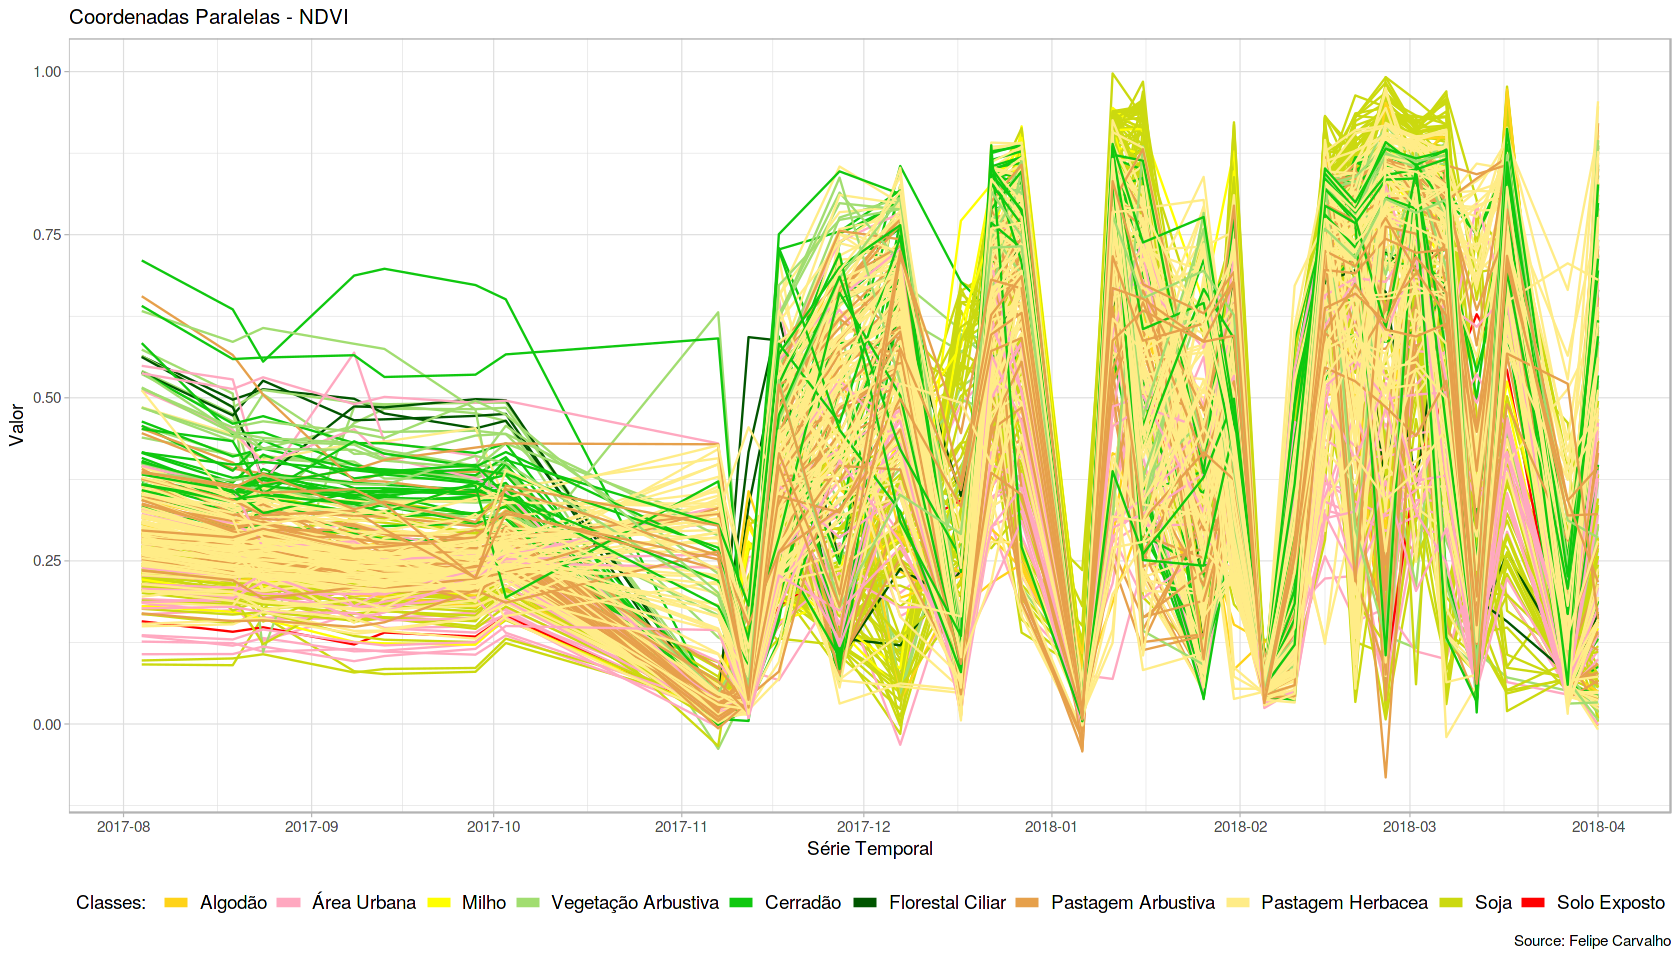

In [20]:
options(repr.plot.width=14, repr.plot.height=8)

dados_claudio %>% dplyr::group_by(X,
           Y,
           label,
           start_date,
           end_date,
           coverage) %>%
    tidyr::unnest() %>% 
ggplot(aes(x=Index, y=ndvi, group=id, colour=label)) +
  geom_line() +
  labs(title="Coordenadas Paralelas - NDVI",
       caption="Source: Felipe Carvalho",
       y=expression("Valor"),
       x="Série Temporal") +
  scale_x_date(labels = date_format("%Y-%m"),
               breaks='1 month') +
  theme(plot.title = element_text(size=12),
        strip.background = element_blank(),
        legend.position="bottom",
        legend.text = element_text(size = 11)) +
    guides(colour = guide_legend(nrow = 1, override.aes = list(size = 2))) +
    scale_color_manual(name = "Classes: ",
                     labels = c("Algodão",
                                "Área Urbana",
                                "Milho",
                                "Vegetação Arbustiva",
                                "Cerradão",
                                "Florestal Ciliar",
                                "Pastagem Arbustiva",
                                "Pastagem Herbacea",
                                "Soja",
                                "Solo Exposto"),
                     values = c("#ffd319",
                                "#ffa8c0",
                                "#ffff00",
                                "#a1dd70",
                                "#0fc80f",
                                "#005500",
                                "#e6a04b",
                                "#ffec87",
                                "#cbd90f",
                                "#ff0000"))

 A célula acima apresenta em forma de coordenadas paralelas as séries temporais extraídas do conjunto de imagens correspondentes ao período de agosto de 2017 a abril de 2018. É possível observar a sobreposição de linhas entre as classes e alguns padrões temporais, por exemplo as quedas no período de janeiro a fevereiro de 2018. Assim, a sobreposição de linhas e similiridade espectral entre as classes dificulta a interpretação do gráfico. 

<br/>

**2. Se não, se analisado as amostras por classe, é possível obter alguma informação usando coordenadas paralelas?**


In [21]:
# Quantidade de amostras por classe
dados_count <- dados_claudio %>%
    dplyr::group_by(label) %>%
    dplyr::count() %>%
    dplyr::ungroup() %>% 
    dplyr::left_join(dados_claudio, by="label")
 

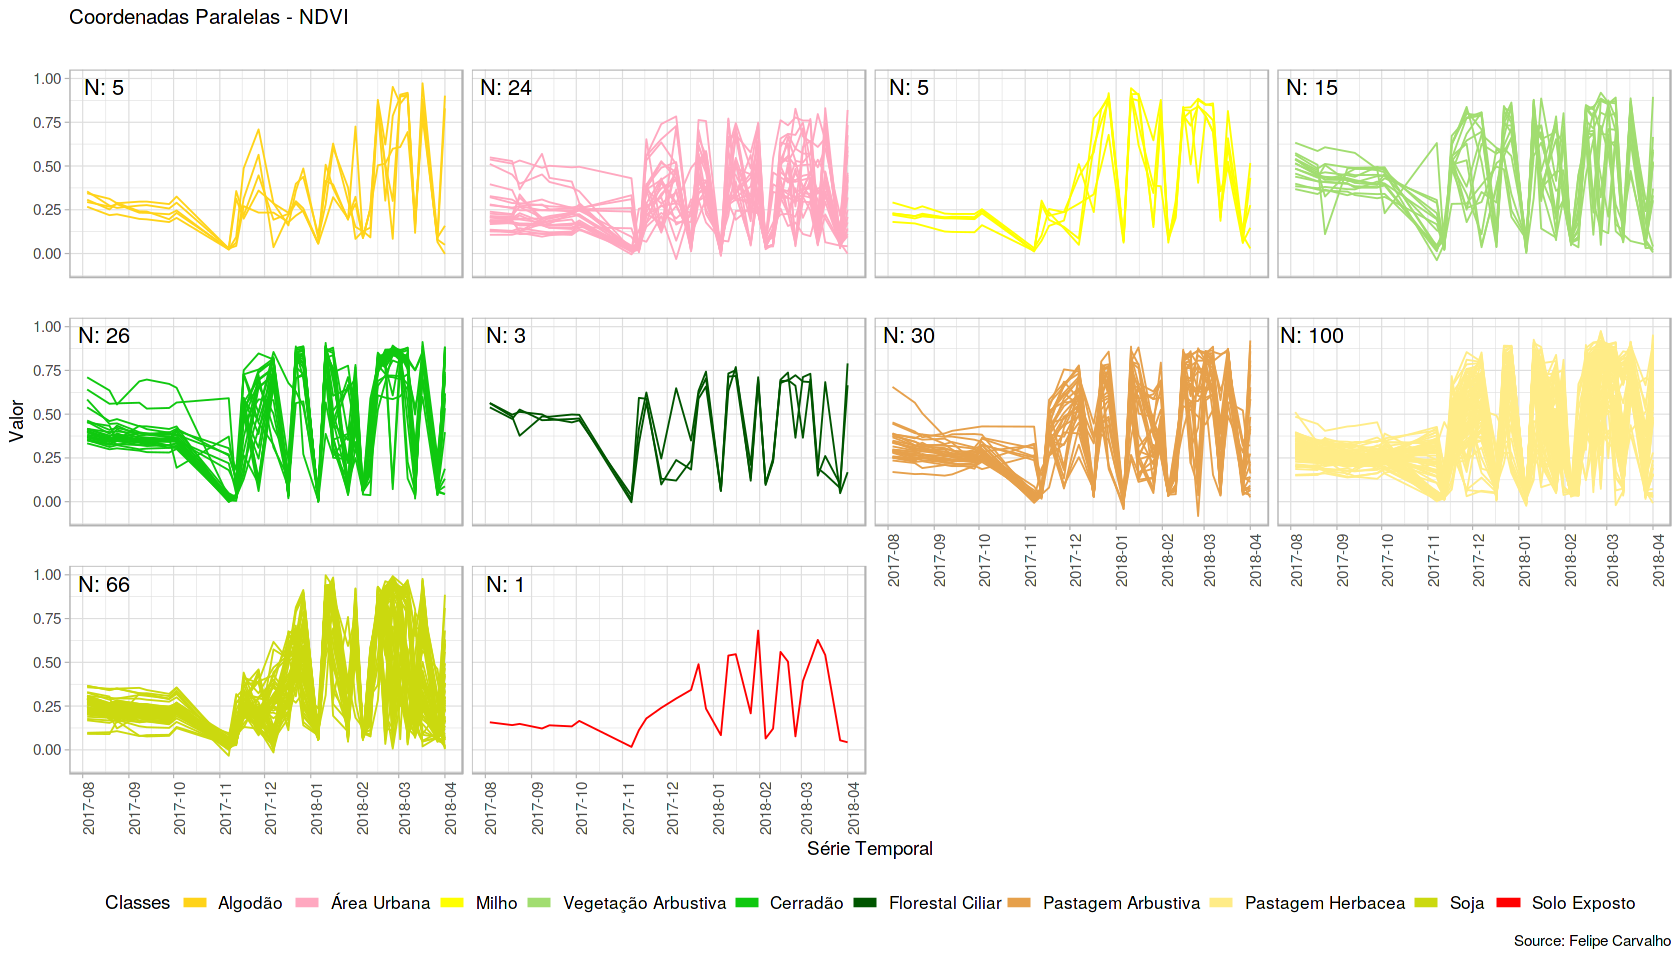

In [22]:
dados_count %>% dplyr::group_by(X,
           Y,
           label,
           start_date,
           end_date,
           coverage) %>%
    tidyr::unnest() %>% 
ggplot(aes(x=Index,y= ndvi, group=id, colour = label)) +
  geom_line(size = 0.4) +
  labs(title="Coordenadas Paralelas - NDVI",
       caption="Source: Felipe Carvalho",
       y = expression("Valor"),
       x="Série Temporal") +
  scale_x_date(labels = date_format("%Y-%m"),
               breaks='1 month') +
  facet_wrap(vars(label)) +
  theme(plot.title = element_text(size=12),
        strip.background = element_blank(),
        axis.text.x = element_text(angle = 90),
       legend.position="bottom",
        legend.text = element_text(size = 10)) +
    guides(colour = guide_legend(nrow = 1, override.aes = list(size = 2))) +
  scale_color_manual(name = "Classes",
                     labels = c("Algodão",
                                "Área Urbana",
                                "Milho",
                                "Vegetação Arbustiva",
                                "Cerradão",
                                "Florestal Ciliar",
                                "Pastagem Arbustiva",
                                "Pastagem Herbacea",
                                "Soja",
                                "Solo Exposto"),
                     values = c("#ffd319",
                                "#ffa8c0",
                                "#ffff00",
                                "#a1dd70",
                                "#0fc80f",
                                "#005500",
                                "#e6a04b",
                                "#ffec87",
                                "#cbd90f",
                                "#ff0000")) +
geom_text(aes(
    y = 0.95,
    x = as.Date("2017-08-15", "%Y-%m-%d"),
    label = paste("N:", n)), check_overlap = TRUE,
    show.legend = FALSE,
    colour="black",
    size = 4.5)


Com a visualização por grades é possível observar que o padrão de quedas e picos está presente em todas as classes da série temporal, o que leva a conclusão de ruídos nas imagens. Foi analisado as imagens nos períodos de pico e queda e algumas são apresentadas na Figura 3.  

 <figure>
  <img src="img/image_clouds.png" alt="logo">
  <figcaption> Figura 3: Presença de nuvens nas imagens</figcaption>
</figure> 

**3. Se aplicado algum algoritmo de agrupamento, é possível detectar grupos com períodos de plantação e colheita?**


O algoritmo de agrupamento utilizado neste trabalho é o SOM (do inglês, *Self Organizing-maps*), na qual usa o procedimento de aprendizado competitivo para mapear os vetores de entrada multidimensionais em uma grade regular de baixa dimensão (bidimensional ou tridimensional). Para realizar o treinamento, visualização e tratamento dos dados foram utilizados os seguintes pacotes: [Kohonen](https://CRAN.R-project.org/package=kohonen), [ggplot2](https://CRAN.R-project.org/package=ggplot2) e [ggsom](https://CRAN.R-project.org/package=ggsom), respectivamente.

**OBS.:** Para a aplicação do algoritmo SOM serão necessárias algumas manipulações no conjunto de dados, as mesmas serão detalhadas 

<br/>

Transformação do conjunto de dados no formato wide, de forma que, as séries NDVI fiquem mapeadas como atributos

In [23]:
wide_dataset <- dados_claudio$time_series %>%
  purrr::map(function(ts){
    as.data.frame(t(unlist(ts[-1])))
  }) %>% data.table::rbindlist()

tibble::glimpse(wide_dataset)

Observations: 275
Variables: 31
$ ndvi1  <dbl> 0.26905626, 0.21088435, 0.30594780, 0.23704415, 0.27112914, 0.…
$ ndvi2  <dbl> 0.25101128, 0.19791440, 0.26772139, 0.22043996, 0.24065770, 0.…
$ ndvi3  <dbl> 0.2616858, 0.1830601, 0.2821311, 0.1570567, 0.2384143, 0.21593…
$ ndvi4  <dbl> 0.24843339, 0.18711591, 0.26263823, 0.21118568, 0.23915279, 0.…
$ ndvi5  <dbl> 0.2523874, 0.1834540, 0.2619138, 0.2080157, 0.2356586, 0.21543…
$ ndvi6  <dbl> 0.24131593, 0.18763536, 0.24311333, 0.20683972, 0.22705681, 0.…
$ ndvi7  <dbl> 0.2557206, 0.2069717, 0.2678353, 0.2291231, 0.2511667, 0.23178…
$ ndvi8  <dbl> 0.016779288, 0.094713434, 0.084836339, 0.065357185, 0.03550724…
$ ndvi9  <dbl> 0.10523136, 0.11609926, 0.22714963, 0.31819961, 0.30393375, 0.…
$ ndvi10 <dbl> 0.2575984, 0.1956224, 0.3220422, 0.2666363, 0.3457471, 0.32759…
$ ndvi11 <dbl> 0.19312858, 0.14885373, 0.16760517, 0.10460993, 0.19321486, 0.…
$ ndvi12 <dbl> 0.286764706, 0.073978735, 0.444061962, 0.263292761, 0.31764168…
$ ndvi13 <dbl> 0.544

Cada atributo **ndvi** corresponde a uma série temporal com 275 observações, ou seja, cada amostra possui 31 valores de **ndvi** ao longo do tempo.

In [24]:
# Adição do atributo categorico reference a classe de cada amostra e filtragem dos valores de NDVI
dados_wide <- data.table::data.table("id" = 1:nrow(dados_claudio),
                                     "reference" = dados_claudio$label,
                                     cbind(wide_dataset)) %>%
tibble::as_tibble(.name_repair = "minimal") %>%
dplyr::select(id,
              reference,
              ndvi1:ndvi31) %>%
dplyr::filter_at(vars(ndvi1:ndvi31), all_vars(. <=1))

head(dados_wide)

id reference ndvi1     ndvi2     ndvi3     ndvi4     ndvi5     ndvi6    
1 1  Soja      0.2690563 0.2510113 0.2616858 0.2484334 0.2523874 0.2413159
2 2  Soja      0.2108844 0.1979144 0.1830601 0.1871159 0.1834540 0.1876354
3 3  Soja      0.3059478 0.2677214 0.2821311 0.2626382 0.2619138 0.2431133
4 4  Soja      0.2370441 0.2204400 0.1570567 0.2111857 0.2080157 0.2068397
5 5  Soja      0.2711291 0.2406577 0.2384143 0.2391528 0.2356586 0.2270568
6 6  Soja      0.2362549 0.2206698 0.2159341 0.2131219 0.2154300 0.2027668
  ndvi7     ndvi8      ⋯ ndvi22    ndvi23    ndvi24    ndvi25    ndvi26   
1 0.2557206 0.01677929 ⋯ 0.4422181 0.8960725 0.8489676 0.3304709 0.3111063
2 0.2069717 0.09471343 ⋯ 0.4765053 0.8663926 0.8081181 0.9475983 0.8588235
3 0.2678353 0.08483634 ⋯ 0.4370460 0.8436351 0.8370175 0.1329040 0.5571055
4 0.2291231 0.06535718 ⋯ 0.4788931 0.8488613 0.3063753 0.9364382 0.9194837
5 0.2511667 0.03550725 ⋯ 0.4588692 0.8462696 0.8774365 0.1171531 0.4672883
6 0.2317821 0.02717347 ⋯ 0.5146862 0.8405509 0.8530992 0.9330129 0.8984426
  ndvi27     ndvi28    ndvi29     ndvi30    ndvi31     
1 0.49493169 0.3461224 0.08757375 0.2181790 0.265373232
2 0.77130225 0.2820592 0.38295455 0.2427503 0.056277860
3 0.11818748 0.5530742 0.83074407 0.3949552 0.492090637
4 0.04558435 0.4005401 0.44155181 0.1442583 0.018297872
5 0.20364557 0.3940752 0.56516885 0.4615771 0.158740571
6 0.03906484 0.3572464 0.61166181 0.2987395 0.008657048

Visualização após a adição das classes

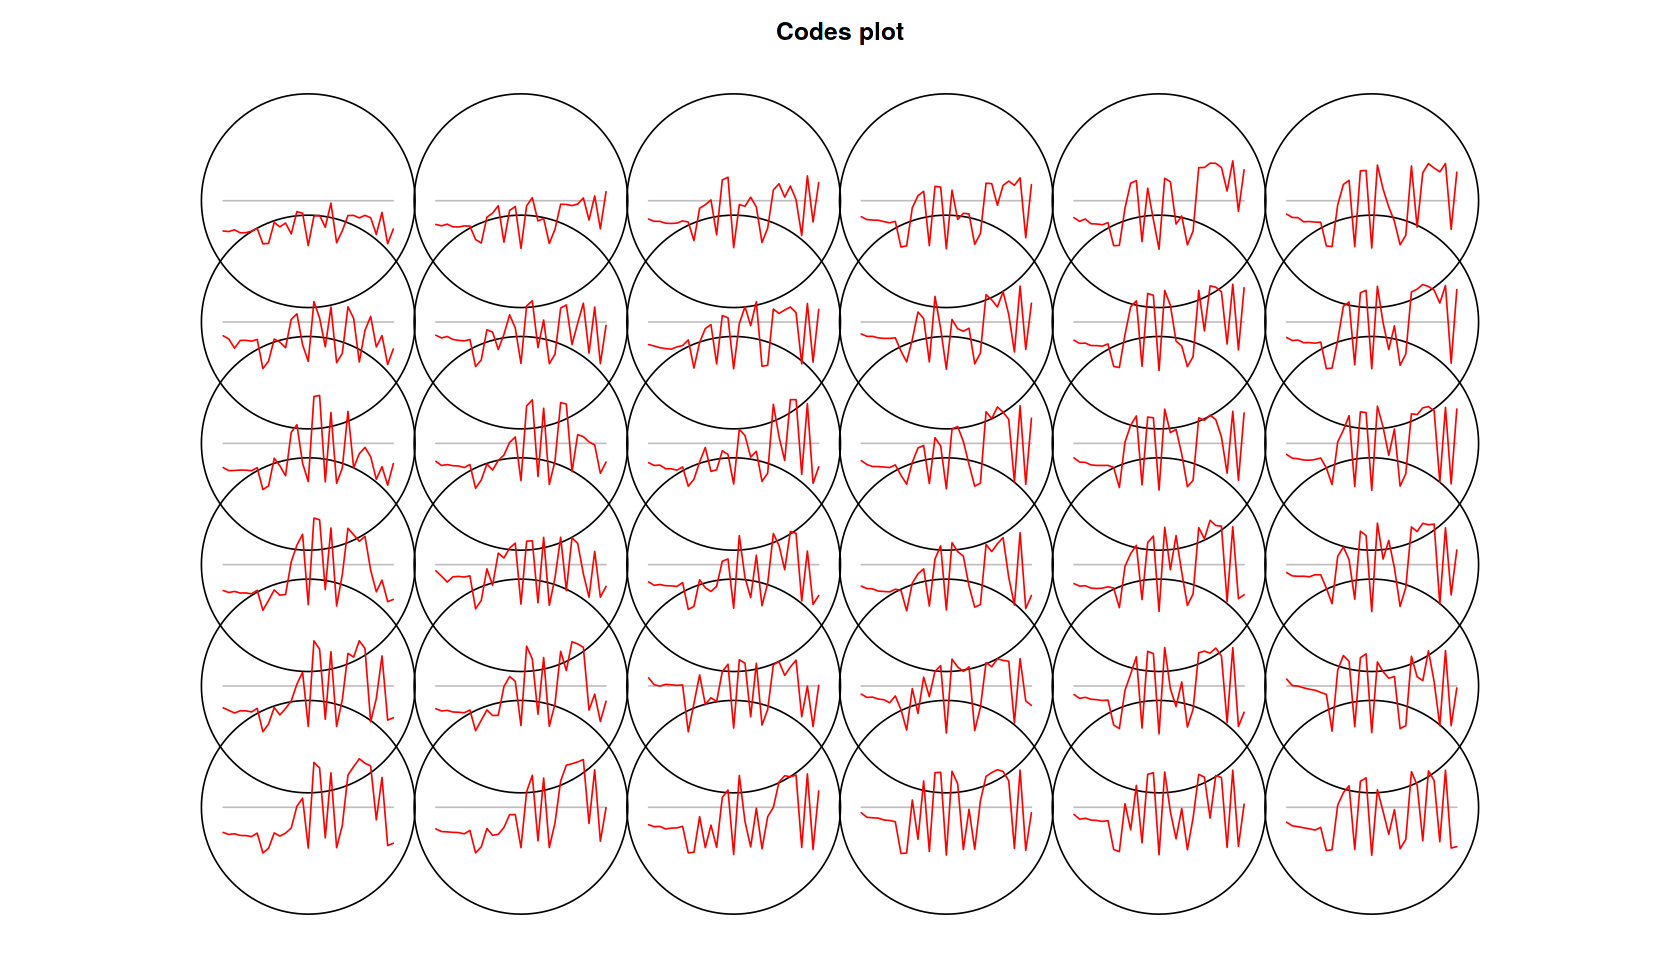

In [25]:
# Seleção da série de NDVI
ndvi_band <- dados_wide %>% dplyr::select(ndvi1:ndvi31) %>% as.matrix() %>% unname()

# definindo a semente pelo fato do SOM inicializar os pesos da rede aleatoriamente
set.seed(42)

# Criação de uma rede SOM de grade 6x6 e a topologia retangular
som_6_6 <- kohonen::som(ndvi_band, grid = kohonen::somgrid(6, 6, "rectangular"))

# Visualização dos codes books da rede treinada
plot(som_6_6)

Com os métodos gráficos disponibilizados pelo pacote Kohonen não é possível extrair a informação se houve ou não períodos de plantação e colheita, pois o SOM é um algoritmo não-supervisionado e o pacote usa essa premissa em relação aos seus método de visualização. 

**4. É possível visualizar as classes e as séries temporais de cada neurônio do SOM?**

Como explicado anteriormente, o pacote Kohonen não dispobiliza o gráfico de coordenadas paralelas para cada neurônio, pois está fora de seu escopo. Foi usado o pacote *ggsom* para realizar tal operação.

In [26]:
#' @title aesthetics data of som object
#' @name ggsom_aes
#' @author  Felipe Carvalho, \email{lipecaso@@gmail.com} 
#' @references `Kohonen`package (https://CRAN.R-project.org/package=kohonen) and
#' `sits` package (https://CRAN.R-project.org/package=sits)
#'
#' @description Function to join categorical classes and mapping each neuron of SOM 
#' 
#' @param model_som object of self-organising maps (SOMs) - Kohonen package
#' @param class categorical attribute with dataset classes
#' @return Model data that is used in plots
#'
#' @export
ggsom_aes <- function(model_som, class) {
  
  assertthat::assert_that(is.kohonen(model_som))

  # Creating a data frame from the SOMs object
  model_som_values <-
    data.table::data.table(model_som$data[[1]],
                           unit.class = model_som$unit.classif,
                           class,
                           id = (1:nrow(model_som$data[[1]]))) %>%
    .[,sum:=.(.N), by="unit.class"]

  # Creating a data frame from the SOMs object of grid points
  model_som_pts <-
    data.table::data.table(model_som$grid$pts,
                           unit.class = 1:nrow(model_som$grid$pts))

  model_som_values <- model_som_pts[model_som_values, on = 'unit.class']

  return(model_som_values)

}

is.kohonen <- function(data) inherits(data, "kohonen")

# Função para mapear cada neurônio do SOM com as classes do conjunto de dados 
ggsom_6_6 <- ggsom_aes(model_som = som_6_6, class = dados_wide[2]) %>% 
    tibble::as_tibble()

head(ggsom_6_6)

x y unit.class V1        V2        V3        V4        V5        V6       
1 2 4 20         0.2690563 0.2510113 0.2616858 0.2484334 0.2523874 0.2413159
2 2 2  8         0.2108844 0.1979144 0.1830601 0.1871159 0.1834540 0.1876354
3 2 4 20         0.3059478 0.2677214 0.2821311 0.2626382 0.2619138 0.2431133
4 1 2  7         0.2370441 0.2204400 0.1570567 0.2111857 0.2080157 0.2068397
5 2 4 20         0.2711291 0.2406577 0.2384143 0.2391528 0.2356586 0.2270568
6 1 2  7         0.2362549 0.2206698 0.2159341 0.2131219 0.2154300 0.2027668
  V7        ⋯ V25       V26       V27        V28       V29        V30      
1 0.2557206 ⋯ 0.3304709 0.3111063 0.49493169 0.3461224 0.08757375 0.2181790
2 0.2069717 ⋯ 0.9475983 0.8588235 0.77130225 0.2820592 0.38295455 0.2427503
3 0.2678353 ⋯ 0.1329040 0.5571055 0.11818748 0.5530742 0.83074407 0.3949552
4 0.2291231 ⋯ 0.9364382 0.9194837 0.04558435 0.4005401 0.44155181 0.1442583
5 0.2511667 ⋯ 0.1171531 0.4672883 0.20364557 0.3940752 0.56516885 0.4615771
6 0.2317821 ⋯ 0.9330129 0.8984426 0.03906484 0.3572464 0.61166181 0.2987395
  V31         reference id sum
1 0.265373232 Soja      1   7 
2 0.056277860 Soja      2  10 
3 0.492090637 Soja      3   7 
4 0.018297872 Soja      4  10 
5 0.158740571 Soja      5   7 
6 0.008657048 Soja      6  10

#### Descrição:
<br/>

- **x**: Coordenada referente à localização do neurônio no eixo x
- **y**: Coordenada referente à localização do neurônio no eixo y
- **unit.class**: Unidade referente ao *grid* no qual a amostra foi mapeada
- **V1:V31**: Série Temporal do NDVI
- **reference**: As classes das amostras coletadas:
    - Algodão
    - Área Urbana
    - Milho
    - Vegetação Arbustiva
    - Cerradão
    - Florestal Ciliar
    - Pastagem Arbustiva
    - Pastagem Herbacea
    - Soja
    - Solo Exposto
- **id**: Identificador de cada amostra
- **sum**: Quantidade de amostras por neurônio
<br/>

Após o treino e manipulação dos dados da rede, é necessário unir as datas referentes a cada amostra. Para realizar tal operação é necessário transformar o conjunto de dados em um formato **Long**:

In [27]:
# Transformando de wide para long
ggsom_gathered_6_6 <- ggsom_6_6 %>% tidyr::gather(atributo,
                                                  valores,
                                                  -unit.class,
                                                  -reference,
                                                  -id,
                                                  -x,
                                                  -y,
                                                  -sum)
head(ggsom_gathered_6_6)

x y unit.class reference id sum atributo valores  
1 2 4 20         Soja      1   7  V1       0.2690563
2 2 2  8         Soja      2  10  V1       0.2108844
3 2 4 20         Soja      3   7  V1       0.3059478
4 1 2  7         Soja      4  10  V1       0.2370441
5 2 4 20         Soja      5   7  V1       0.2711291
6 1 2  7         Soja      6  10  V1       0.2362549

É possível observar na célula acima que todos os atributos **V1:V31** foram transformados em valores. Agora basta juntar as datas de cada índice com as datas do conjunto de dado

In [28]:
# Criação de um conjunto de dados com as datas únicas para cada NDVI
dates_ndvi <- tibble::tibble(dias = dados_claudio$time_series[[1]]$Index,
                atributo = c(paste0("V",1:31)) )

# Junção das datas pelos atributos
ggsom_data_6_6 <- ggsom_gathered_6_6 %>% dplyr::left_join(dates_ndvi, by="atributo")

head(ggsom_data_6_6)

x y unit.class reference id sum atributo valores   dias      
1 2 4 20         Soja      1   7  V1       0.2690563 2017-08-04
2 2 2  8         Soja      2  10  V1       0.2108844 2017-08-04
3 2 4 20         Soja      3   7  V1       0.3059478 2017-08-04
4 1 2  7         Soja      4  10  V1       0.2370441 2017-08-04
5 2 4 20         Soja      5   7  V1       0.2711291 2017-08-04
6 1 2  7         Soja      6  10  V1       0.2362549 2017-08-04

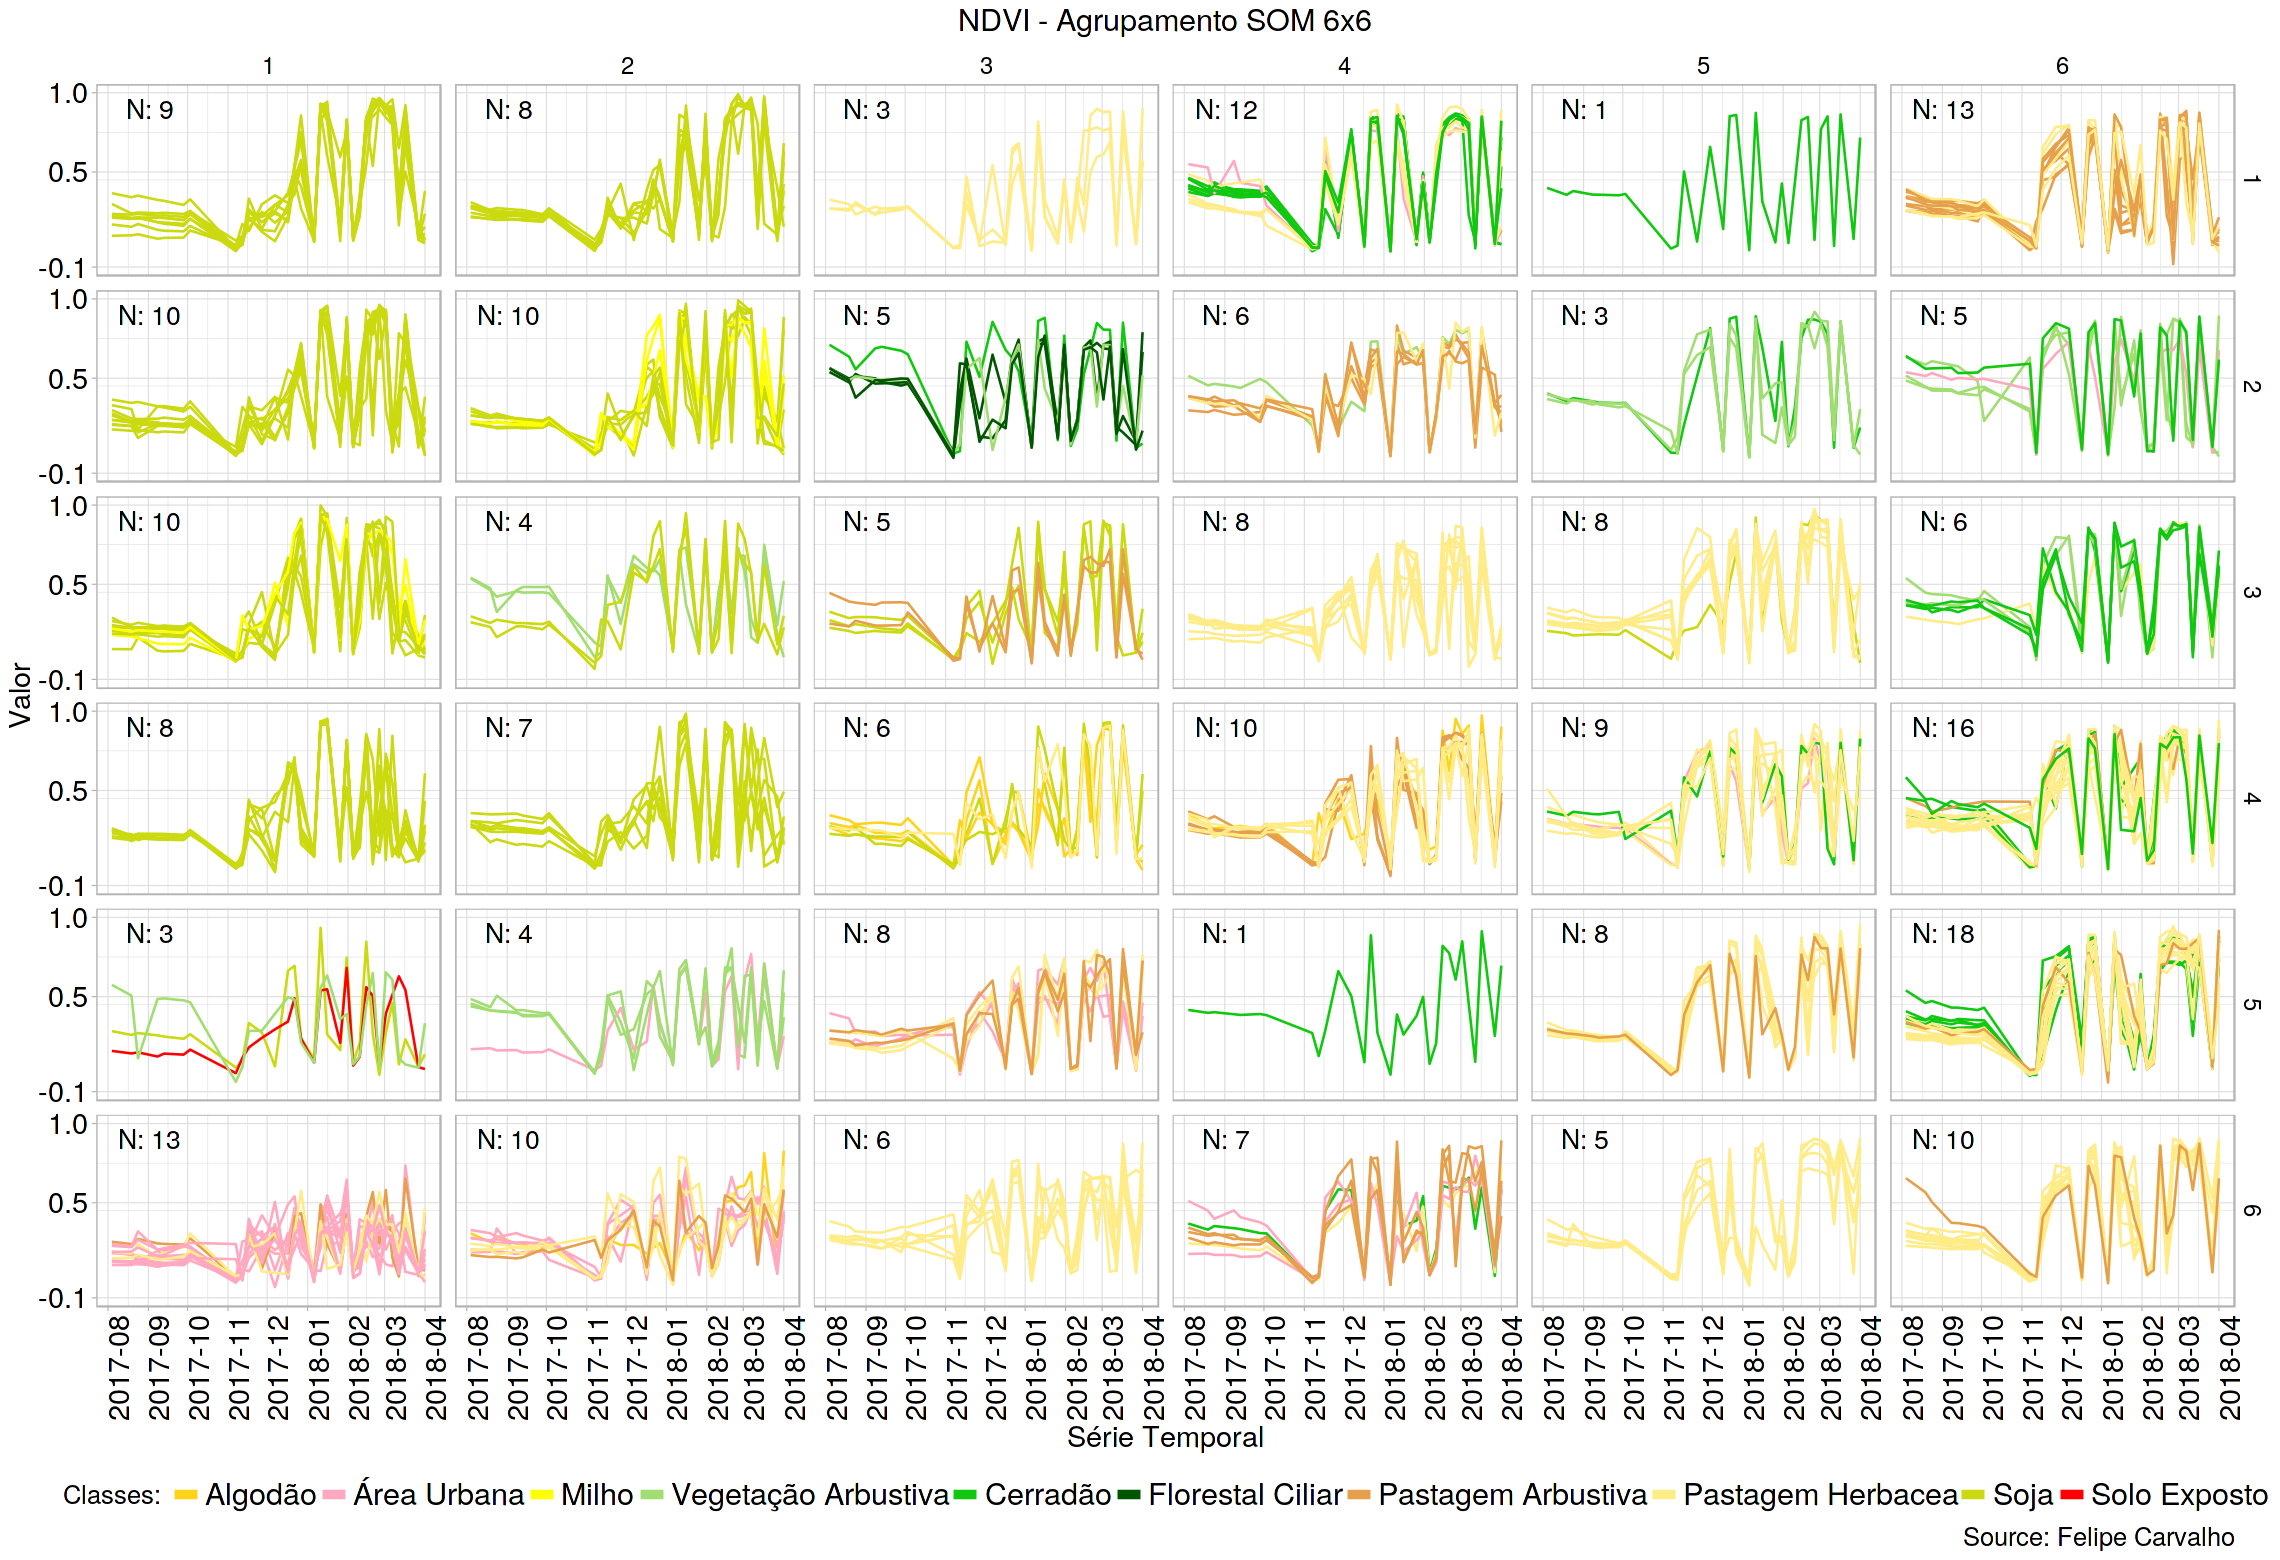

In [29]:
# Alteração das configurações de visualização
options(repr.plot.width=19, repr.plot.height=13)

# Gráfico de coordenadas paralelas com base na rede SOM
ggplot2::ggplot(ggsom_data_6_6, aes(x = dias, y = valores, group = id, color=reference)) +
  geom_line(size=0.55) +
  labs(
    title = "NDVI - Agrupamento SOM 6x6",
    caption = "Source: Felipe Carvalho",
    y = "Valor",
    x = "Série Temporal"
  ) +
  facet_grid(y ~ x, labeller=label_parsed) +
  scale_y_continuous(limits = c(-0.1,1),
                     breaks=c(-0.1, 1, 0.5)) +
  scale_x_date(labels = date_format("%Y-%m"),
               breaks='1 month') +
  theme(
    strip.text.x = element_text(size = 14, colour = "black"),
    strip.text.y = element_text(size = 14, colour = "black"),
    plot.title = element_text(size = 18,
                              hjust= 0.5,
                              margin = margin(b = 7)),
    strip.background = element_blank(),
    panel.spacing = unit(0.6, "lines"),
    axis.text.x = element_text(angle = 90,
                               color = "black",
                               size  = 17,
                               hjust=50),
    axis.text.y = element_text(size = 17, color="black"),
    axis.title.x = element_text(margin = margin(t = 7),
                                size=17),
    axis.title.y = element_text(size = 17),
    legend.position="bottom",
    legend.key.size = unit(1.2, "lines"),
    legend.spacing = unit(0.1, "cm"),
    legend.text = element_text(size = 18),
    legend.title = element_text(size = 15),
    plot.caption = element_text(size = 15, color="black"),
    legend.spacing.x = unit(0.10, 'cm')) +
  guides(colour = guide_legend(nrow = 1, override.aes = list(size = 2)),
         label.hjust = 10,
         fill=guide_legend(
           keywidth=4,
           keyheight=0.1))+
  scale_color_manual(name = "Classes: ",
                     labels = c("Algodão",
                                "Área Urbana",
                                "Milho",
                                "Vegetação Arbustiva",
                                "Cerradão",
                                "Florestal Ciliar",
                                "Pastagem Arbustiva",
                                "Pastagem Herbacea",
                                "Soja",
                                "Solo Exposto"),
                     values = c("#ffd319",
                                "#ffa8c0",
                                "#ffff00",
                                "#a1dd70",
                                "#0fc80f",
                                "#005500",
                                "#e6a04b",
                                "#ffec87",
                                "#cbd90f",
                                "#ff0000")) +
  geom_text(aes(
    y = 0.90,
    x = as.Date("2017-09-02", "%Y-%m-%d"),
    label = paste("N:", sum)), check_overlap = TRUE,
    show.legend = FALSE,
    colour="black",
    size = 5.5)

De acordo com o gráfico apresentado acima, apenas alguns grupos alcançaram uma separação de classes totalmente homogênea, por exemplo: Soja (1x1), Pastagem Herbácea (5x6) e Cerradão (5x1). Aconteceram algumas confusões esperadas, por conta da similaridade espectro-temporal, como: Milho com Soja (2x2), Vegetação Arbustiva com Florestal Ciliar (3x2), Pastagem Herbácea com Pastagem Arbustiva (6x6). Os grupos com os piores resultados são Soja com Solo exposto e Vegetação Arbustiva (1x5), Área Urbana com Vegetação Arbustiva (2x5), Cerradão com pastagem Herbácea e Arbustiva (6x5). Em resumo, os piores resultados se encontram em neurônios com mais de duas classes mapeadas, mas como resultado positivo indicamos que os neurônios homogêneos são os que contém mais observações.

Para tentar obter mais informações, a célula abaixo apresenta um agrupamento SOM 9x9

In [30]:
# definindo a semente pelo fato do SOM inicializar os pesos de forma aletória
set.seed(42)

# Criação de uma rede SOM com a grade de 9x9 e a topologia retangular
som_9_9 <- kohonen::som(ndvi_band, grid = kohonen::somgrid(9, 9, "rectangular"))

# Função para mapear cada neurônio do SOM com as classes do conjunto de dados 
ggsom_9_9 <- ggsom_aes(model_som = som_9_9, class = dados_wide[2]) %>% 
    tibble::as_tibble()

# Transformando de wide para long
ggsom_gathered_9_9 <- ggsom_9_9 %>% tidyr::gather(atributo,
                                                  valores,
                                                  -unit.class,
                                                  -reference,
                                                  -id,
                                                  -x,
                                                  -y,
                                                  -sum)

# Criação de um conjunto de dados com as datas únicas para cada NDVI
dates_ndvi <- tibble(dias = dados_claudio$time_series[[1]]$Index,
                atributo = c(paste0("V",1:31)) )

# Junção das datas pelos atributos
ggsom_data_9_9 <- ggsom_gathered_9_9 %>% dplyr::left_join(dates_ndvi, by="atributo")

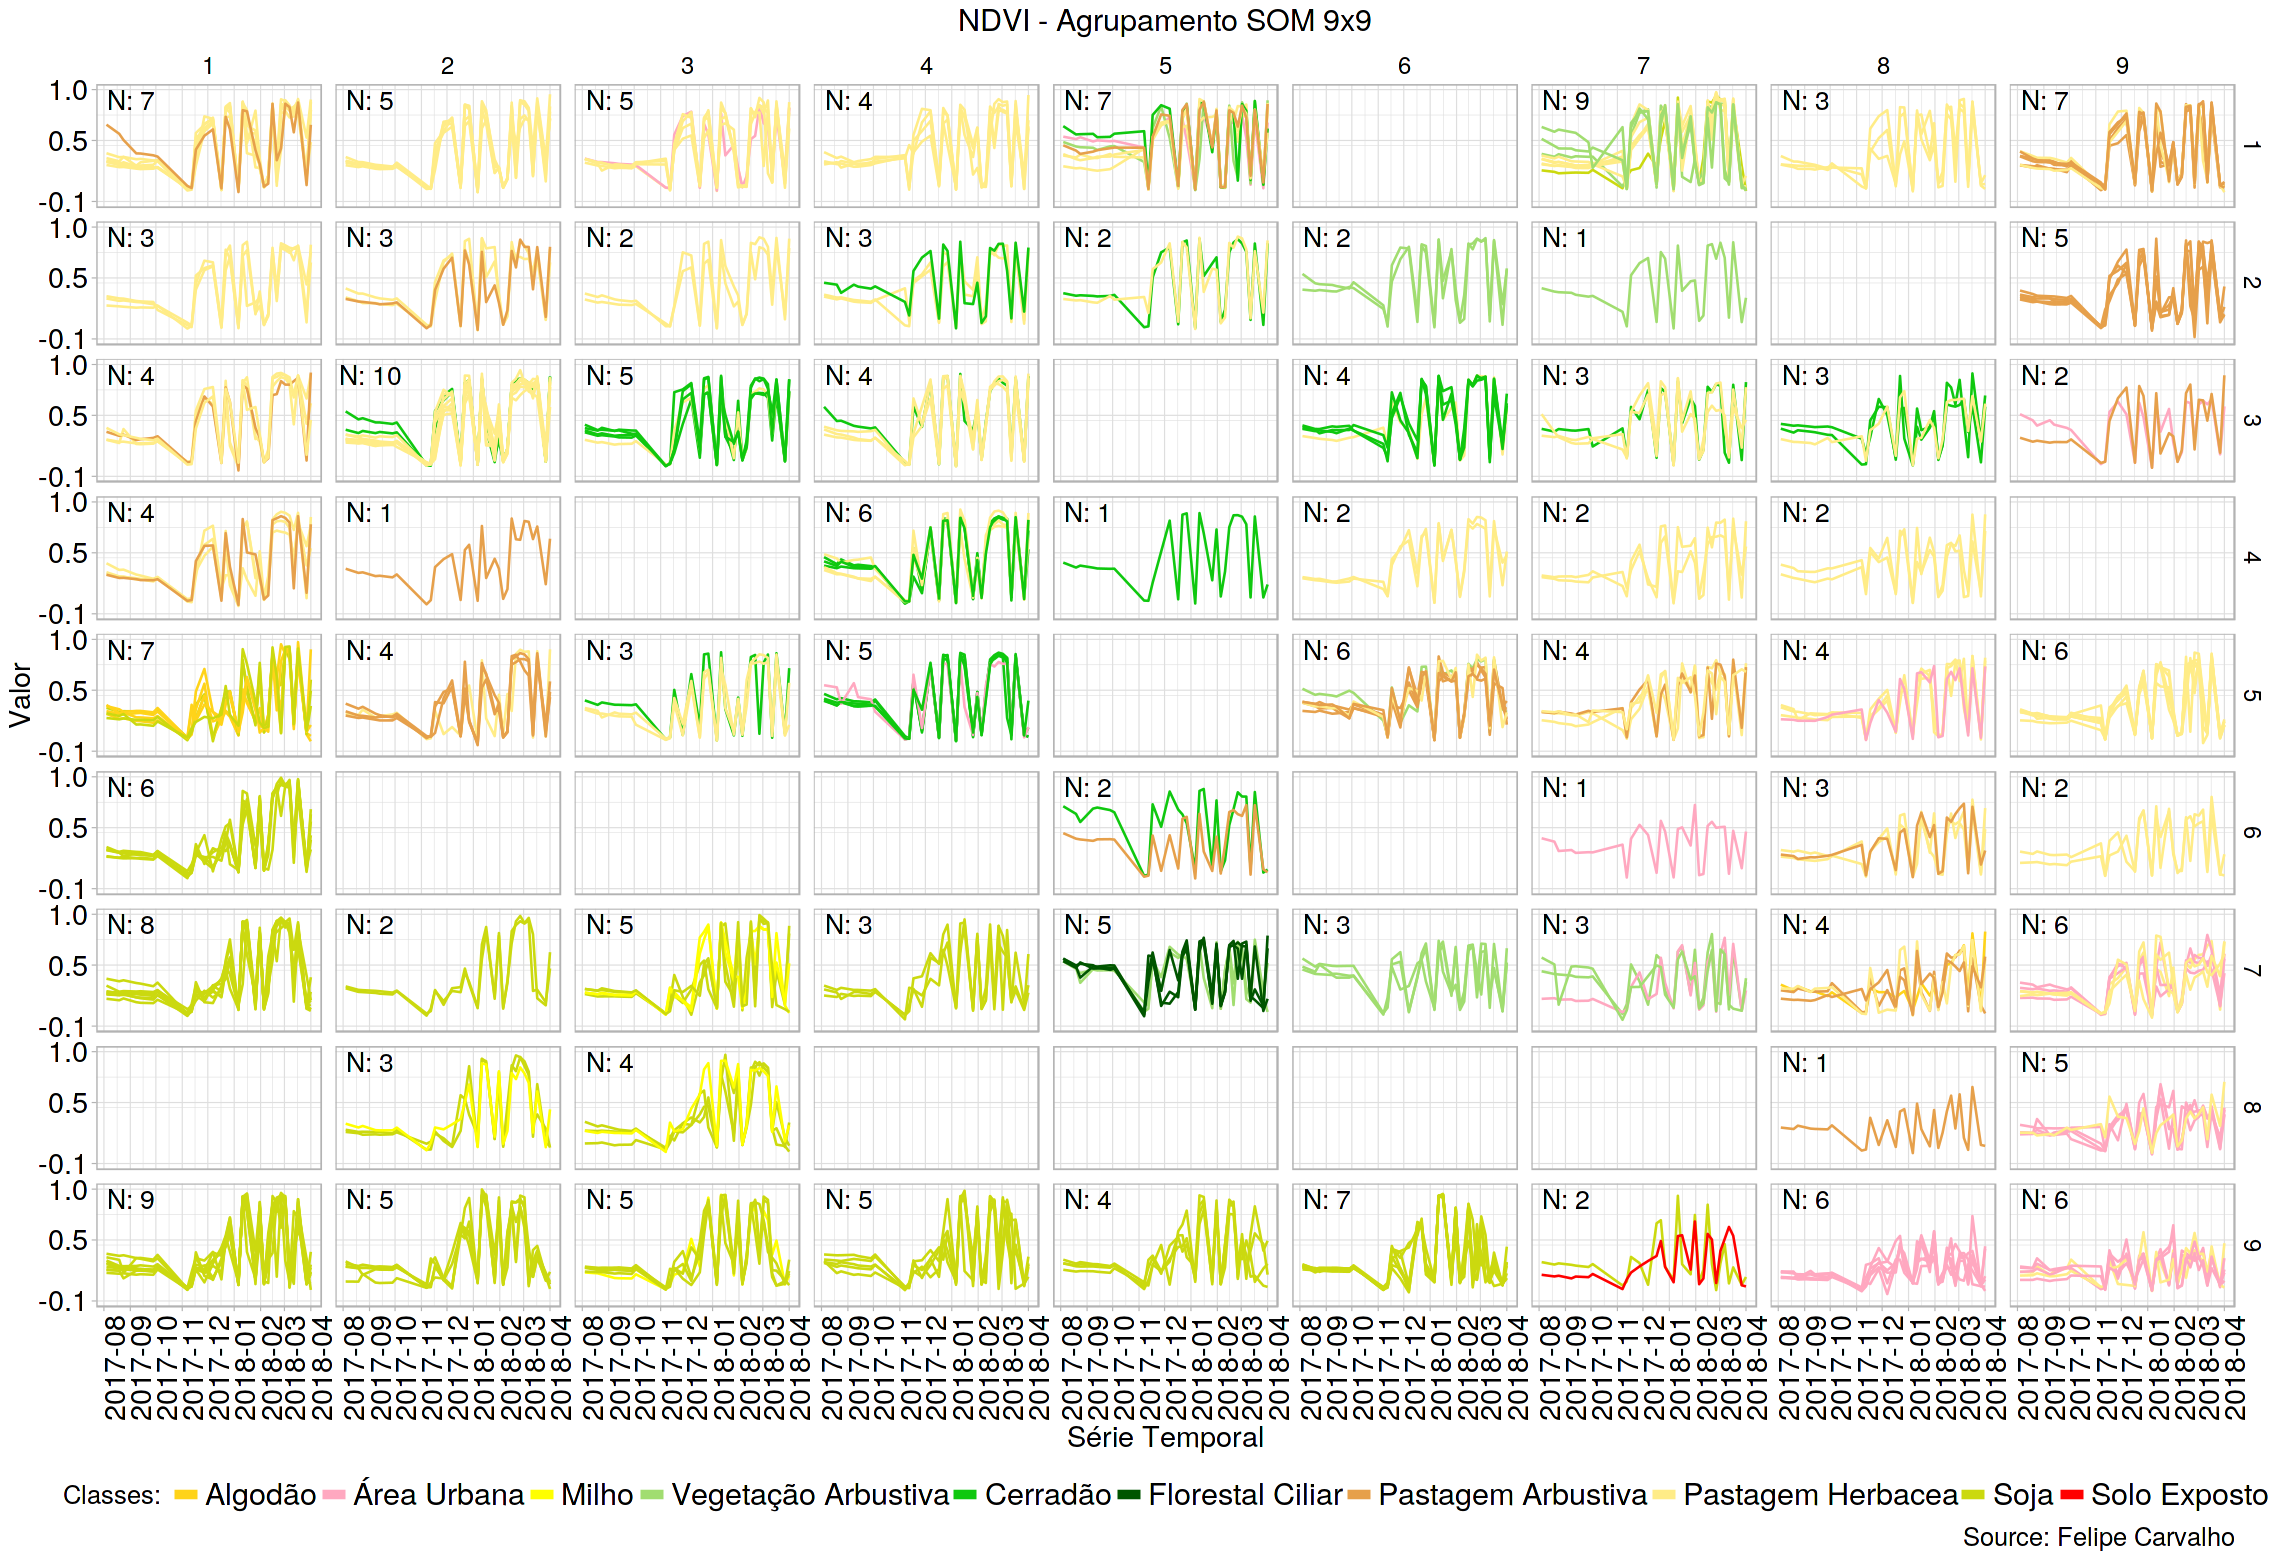

In [31]:
# Alteração das configurações de visualização
options(repr.plot.width=19, repr.plot.height=13)

# Gráfico de coordenadas paralelas com base na rede SOM
ggplot2::ggplot(ggsom_data_9_9, aes(x = dias, y = valores, group = id, color=reference)) +
  geom_line(size=0.55) +
  labs(
    title = "NDVI - Agrupamento SOM 9x9",
    caption = "Source: Felipe Carvalho",
    y = "Valor",
    x = "Série Temporal"
  ) +
  facet_grid(y ~ x, labeller=label_parsed) +
  scale_y_continuous(limits = c(-0.1,1),
                     breaks=c(-0.1, 1, 0.5)) +
  scale_x_date(labels = date_format("%Y-%m"),
               breaks='1 month') +
  theme(
    strip.text.x = element_text(size = 14, colour = "black"),
    strip.text.y = element_text(size = 14, colour = "black"),
    plot.title = element_text(size = 18,
                              hjust= 0.5,
                              margin = margin(b = 7)),
    strip.background = element_blank(),
    panel.spacing = unit(0.6, "lines"),
    axis.text.x = element_text(angle = 90,
                               color = "black",
                               size  = 17,
                               hjust=50),
    axis.text.y = element_text(size = 17, color="black"),
    axis.title.x = element_text(margin = margin(t = 7),
                                size=17),
    axis.title.y = element_text(size = 17),
    legend.position="bottom",
    legend.key.size = unit(1.2, "lines"),
    legend.spacing = unit(0.1, "cm"),
    legend.text = element_text(size = 18),
    legend.title = element_text(size = 15),
    plot.caption = element_text(size = 15, color="black"),
    legend.spacing.x = unit(0.10, 'cm')) +
  guides(colour = guide_legend(nrow = 1, override.aes = list(size = 2)),
         label.hjust = 10,
         fill=guide_legend(
           keywidth=4,
           keyheight=0.1))+
  scale_color_manual(name = "Classes: ",
                     labels = c("Algodão",
                                "Área Urbana",
                                "Milho",
                                "Vegetação Arbustiva",
                                "Cerradão",
                                "Florestal Ciliar",
                                "Pastagem Arbustiva",
                                "Pastagem Herbacea",
                                "Soja",
                                "Solo Exposto"),
                     values = c("#ffd319",
                                "#ffa8c0",
                                "#ffff00",
                                "#a1dd70",
                                "#0fc80f",
                                "#005500",
                                "#e6a04b",
                                "#ffec87",
                                "#cbd90f",
                                "#ff0000")) +
  geom_text(aes(
    y = 0.90,
    x = as.Date("2017-09-02", "%Y-%m-%d"),
    label = paste("N:", sum)), check_overlap = TRUE,
    show.legend = FALSE,
    colour="black",
    size = 5.5)

No agrupamento de 9x9, grupos diferentes se formaram, por exemplo Soja e Solo Exposto (7x9), no entanto, ainda não é possível obter a informação do período de plantação e colheita devido aos picos e quedas da série temporal. Desta forma, o uso de imagens *stackadas* sem nenhum filtro pode ser inviável para regiões com muitas nuvens, por exemplo o oeste da Bahia. Porém, foi possível detectar a homogeneidade de algumas classes, por exemplo Soja, informação útil para futuramente utilizar algoritmos de classificação.

Uma possível abordagem para melhorar a qualidade das imagens é o uso de métodos de agregação em cubos de imagens, de forma a aplicar funções estatística para filtrar as imagens em um determinado período de tempo. Para realizar o teste de agregação foi utilizado o pacote [Gdalcubes](https://CRAN.R-project.org/package=gdalcubes) e o script pode ser encontrado no arquivo *script_gdalcubes.R* no diretório *script*. Assim como nas imagens sem agregação, a extração da série temporal foi feita com o uso do pacote [ets](https://github.com/oldlipe/ets).

**5. Se realizar a agregação por mediana em um cubo de dados é possível identificar os períodos de colheita e plantação nas classes de vegetação?**



In [35]:
# Importação da série temporal extraída
load("./data/amostras_cladio_cubo_de_dados.RData")

# Visualização das primeiras linhas
head(data, 3)

X         Y         label start_date end_date   coverage
1 -45.84315 -12.81337 Soja  2017-08-01 2018-04-30 S30     
2 -45.84238 -12.82265 Soja  2017-08-01 2018-04-30 S30     
3 -45.85110 -12.81825 Soja  2017-08-01 2018-04-30 S30     
  time_series                                                                                                                                                                                                           
1 17401 , 17410 , 17440 , 17471 , 17501 , 17532 , 17563 , 17591 , 17622 , 1886  , 1960  , 1850  , 3896  , 1577  , 1093  , 802   , 1702.5, 1588  , 2650  , 2756  , 2699  , 4792  , 3825  , 6183  , 6529  , 3635  , 2702  
2 17401 , 17410 , 17440 , 17471 , 17501 , 17532 , 17563 , 17591 , 17622 , 1768  , 1929  , 1839  , 2968.5, 1041  , 404   , 2414  , 2090  , 1509  , 2940  , 3213  , 3131  , 3970  , 3217.5, 5797  , 6192  , 3612  , 2953  
3 17401 , 17410 , 17440 , 17471 , 17501 , 17532 , 17563 , 17591 , 17622 , 1843  , 1940  , 1805  , 3062.5, 1559  , 1019  , 1203  , 1393.5, 1335  , 2733  , 2862  , 2759  , 3949  , 3791  , 6071  , 6412  , 3838.5, 2723

**Pré-processamento dos dados**

In [42]:
# Filtro dos valores maiores que zero na banda 4 e conversão das datas 
dados_gdalcubes <- data %>%
  dplyr::group_by(X,
           Y,
           label,
           start_date,
           end_date,
           coverage) %>%
  tidyr::unnest() %>%
  dplyr::filter(B4 > 0) %>%
  dplyr::mutate(Index = lubridate::as_date(as.integer(Index))) %>%
  dplyr::mutate(Index = replace(Index, Index == "2017-08-23", "2017-08-01"))


# Gera o indice NDVI
dados_gdalcubes <- dados_gdalcubes %>%
  dplyr::select (X:Index, B4, B8A) %>%
  dplyr::mutate(ndvi = get_ndvi(B8A, B4)) %>%
  dplyr::select(X:Index, ndvi) %>%
  tidyr::nest() %>%
  dplyr::rename(time_series = data) %>%
  dplyr::mutate(id = 1:nrow(.))


# Remove as amostras cuja série não é completa
dados_gdalcubes <-
  dados_gdalcubes %>%
  dplyr::filter(purrr::map(time_series, remove_obs, value = 8) == TRUE)


# Transforma as séries no modo wide
#' @references sits
wide_dataset_cubes <- dados_gdalcubes$time_series %>%
  purrr::map(function(ts){
    as.data.frame(t(unlist(ts[-1])))
  }) %>% data.table::rbindlist()

# create a data frame with the first two columns for training
dados_wide_gdalcubes <- data.table::data.table("id" = 1:nrow(dados_gdalcubes),
                                       "reference" = dados_gdalcubes$label,
                                       cbind(wide_dataset_cubes)) %>%
  tibble::as_tibble(.name_repair = "minimal") %>%
  dplyr::select(id,
         reference,
         ndvi1:ndvi9) %>%
  dplyr::filter_at(vars(ndvi1:ndvi9), all_vars(. <=1))

# Série temporal em formato wide
head(wide_dataset_cubes, 3)

ndvi1     ndvi2     ndvi3     ndvi4     ndvi5     ndvi6     ndvi7    
1 0.1684303 0.1687871 0.1866344 0.1031308 0.4161422 0.6995602 0.7812031
2 0.2489380 0.2497083 0.2599598 0.1443396 0.5110955 0.8696984 0.4389960
3 0.1944930 0.1920033 0.2090272 0.1264351 0.4171963 0.7125529 0.6840446
  ndvi8     ndvi9    
1 0.3620609 0.2596737
2 0.2669239 0.3236217
3 0.4673165 0.3420404

In [45]:
# Quantidade de amostras por classe
dados_count_cubes <- dados_gdalcubes %>%
    dplyr::group_by(label) %>%
    dplyr::count() %>%
    dplyr::ungroup() %>% 
    dplyr::left_join(dados_gdalcubes, by="label")

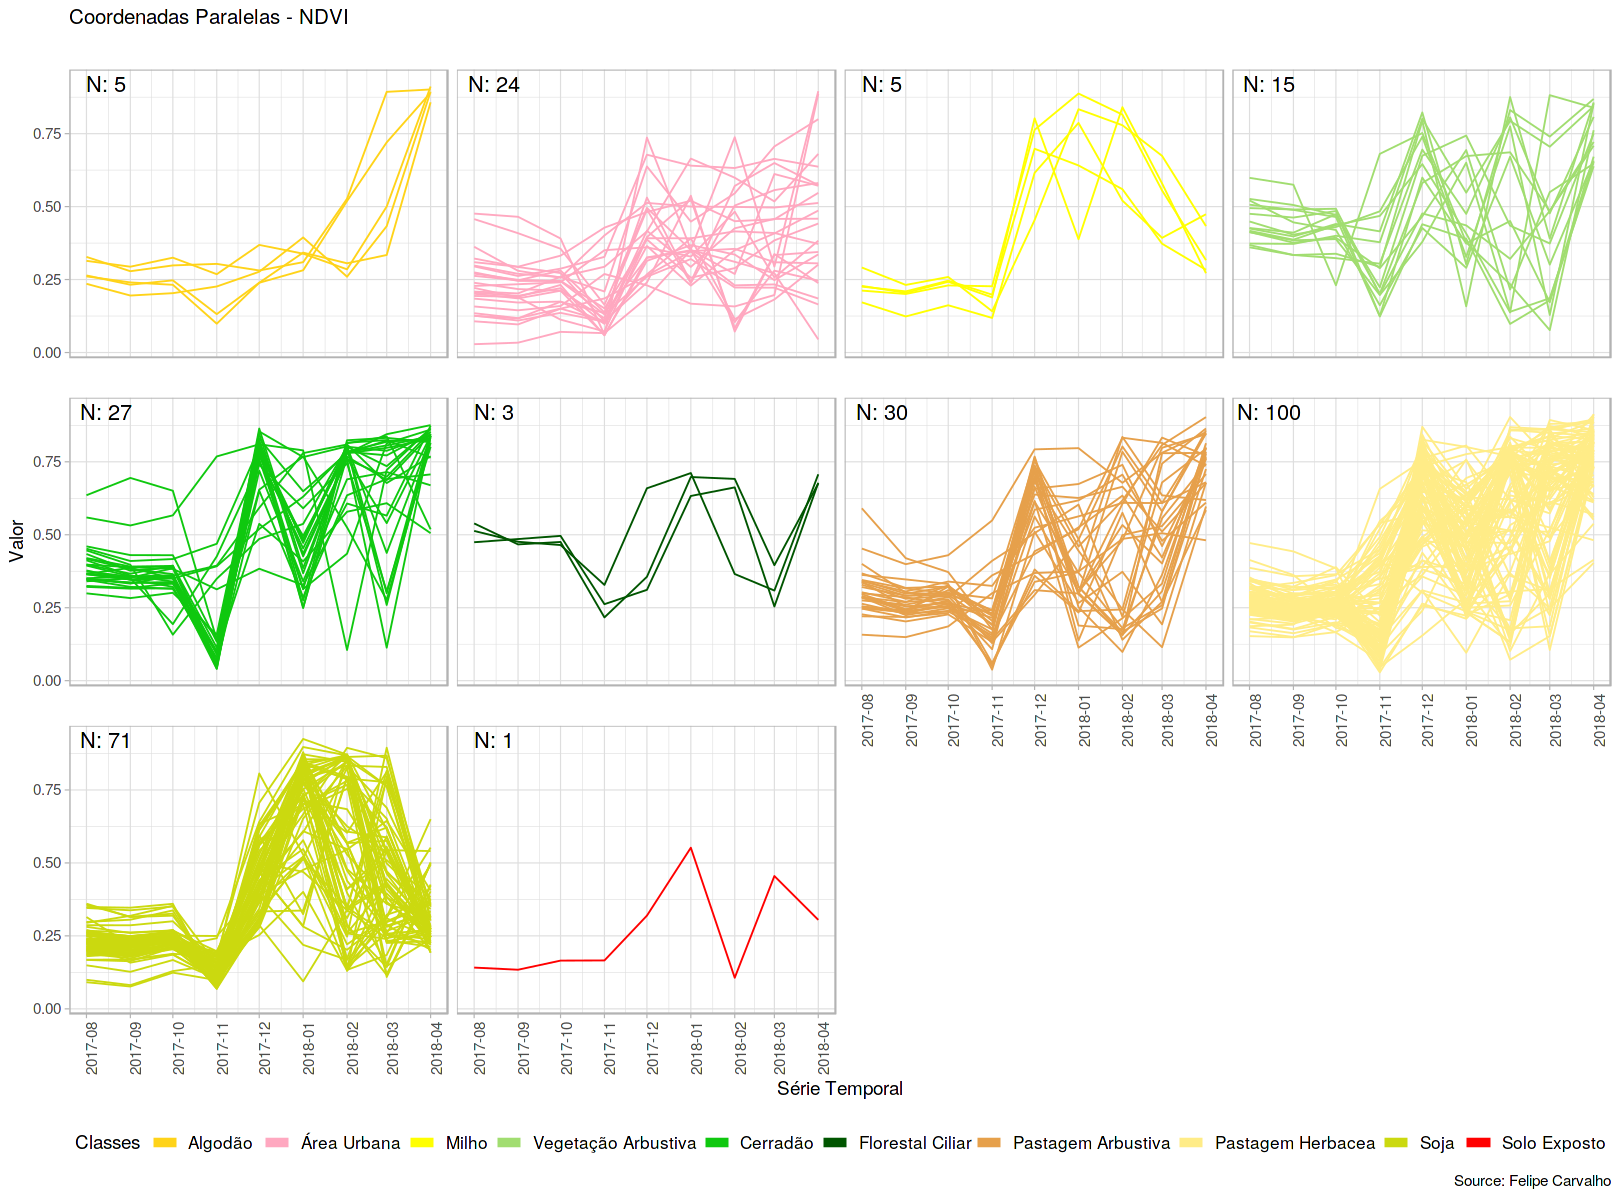

In [55]:
options(repr.plot.width=13.5, repr.plot.height=10)

dados_count_cubes %>% dplyr::group_by(X,
           Y,
           label,
           start_date,
           end_date,
           coverage) %>%
    tidyr::unnest() %>% 
ggplot(aes(x=Index,y= ndvi, group=id, colour = label)) +
  geom_line(size = 0.4) +
  labs(title="Coordenadas Paralelas - NDVI",
       caption="Source: Felipe Carvalho",
       y = expression("Valor"),
       x="Série Temporal") +
  scale_x_date(labels = date_format("%Y-%m"),
               breaks='1 month') +
  facet_wrap(vars(label)) +
  theme(plot.title = element_text(size=12),
        strip.background = element_blank(),
        axis.text.x = element_text(angle = 90),
       legend.position="bottom",
        legend.text = element_text(size = 10)) +
    guides(colour = guide_legend(nrow = 1, override.aes = list(size = 2))) +
  scale_color_manual(name = "Classes",
                     labels = c("Algodão",
                                "Área Urbana",
                                "Milho",
                                "Vegetação Arbustiva",
                                "Cerradão",
                                "Florestal Ciliar",
                                "Pastagem Arbustiva",
                                "Pastagem Herbacea",
                                "Soja",
                                "Solo Exposto"),
                     values = c("#ffd319",
                                "#ffa8c0",
                                "#ffff00",
                                "#a1dd70",
                                "#0fc80f",
                                "#005500",
                                "#e6a04b",
                                "#ffec87",
                                "#cbd90f",
                                "#ff0000")) +
geom_text(aes(
    y = 0.92,
    x = as.Date("2017-08-15", "%Y-%m-%d"),
    label = paste("N:", n)), check_overlap = TRUE,
    show.legend = FALSE,
    colour="black",
    size = 4.5)

A classe de vegetação Algodão apresenta um pico ao final da série o que possívelmente corresponde ao período de crescimento. Por outro lado, apesar de apresentar muitos ruídos, a classe da Soja, apresenta um padrão de crescimento de vegetação de em novembro de 2017, assim como o Milho, e uma queda em abril de 2018. No entanto, mesmo utilizando a abordagem de agregação, ainda há diversos ruídos presentes nas imagens, como visto anteriormente, causados por nuvens.

### Perguntas
6. Se aplicado o algoritmo SOM, é possível obter neurônios com classes que apresentam o mesmo padrão de crescimento (Soja e Milho)? 
7. Como medir a pureza de cada neurônio no SOM?
8. Qual a função de agregação produz mais informações?
9. É Possível gerar novos índices a partir das bandas coletas? se sim, quais?
10. Existe alguma correlação espacial entre as classes? ou seja, as classes mais próximas geográficamente pertence ao mesmo grupo?

<br/>

**6. Se aplicado o algoritmo SOM, é possível obter neurônios com classes que apresentam o mesmo padrão de crescimento (Soja e Milho)?**

Aplicação do SOM

In [56]:
# definindo a semente pelo fato do SOM inicializar os pesos de forma aletória
set.seed(42)

# Transformando as bandas selecionadas em matriz
ndvi_band_gdalcubes <- dados_wide_gdalcubes %>% 
                        dplyr::select(ndvi1:ndvi9) %>% 
                        as.matrix() %>% 
                        unname()


# Criação de uma rede SOM com a grade de 9x9 e a topologia retangular
som_9_9_gdalcubes <- kohonen::som(ndvi_band_gdalcubes, grid = kohonen::somgrid(9, 9, "rectangular"))

# Função para mapear cada neurônio do SOM com as classes do conjunto de dados 
ggsom_9_9_gdalcubes <- ggsom_aes(model_som = som_9_9_gdalcubes, class = dados_wide_gdalcubes[2]) %>% 
    tibble::as_tibble()

# Transformando de wide para long
ggsom_gathered_9_9_gdalcubes <- ggsom_9_9_gdalcubes %>% tidyr::gather(atributo,
                                                  valores,
                                                  -unit.class,
                                                  -reference,
                                                  -id,
                                                  -x,
                                                  -y,
                                                  -sum)

# Criação de um conjunto de dados com as datas únicas para cada NDVI
dates_ndvi <- tibble::tibble(dias = dados_gdalcubes$time_series[[1]]$Index,
                atributo = c(paste0("V",1:9)) )

# Junção das datas pelos atributos
ggsom_data_9_9_cubes <- ggsom_gathered_9_9_gdalcubes %>% dplyr::left_join(dates_ndvi, by="atributo")

# Alterando o nome das classes
ggsom_data_9_9_cubes$reference <-
  dplyr::recode(ggsom_data_9_9_cubes$reference, "Algodao" = "Algodão",
                "Area Urbana" = "Área Urbana",
                "Milho" = "Milho",
                "Pastagem Cult. Arbustiva/Arborea" = "Pastagem Arbustiva",
                "Nat. Florestal Cerradao" = "Cerradão",
                "Nat. Florestal Ciliar" = "Florestal Ciliar",
                "Nat. Arbustivo" = "Vegetação Arbustiva",
                "Pastagem Cult. Herbacea"  = "Pastagem Herbacea",
                "Soja" = "Soja",
                "Solo Exposto" = "Solo Exposto")

ggsom_data_9_9_cubes <- ggsom_data_9_9_cubes %>%
  mutate(reference = factor(reference,
                            levels = c("Algodão",
                                       "Área Urbana",
                                       "Milho",
                                       "Vegetação Arbustiva",
                                       "Cerradão",
                                       "Florestal Ciliar",
                                       "Pastagem Arbustiva",
                                       "Pastagem Herbacea",
                                       "Soja",
                                       "Solo Exposto")))

Visualização da série temporal corresponde a cada neurônio na rede SOM

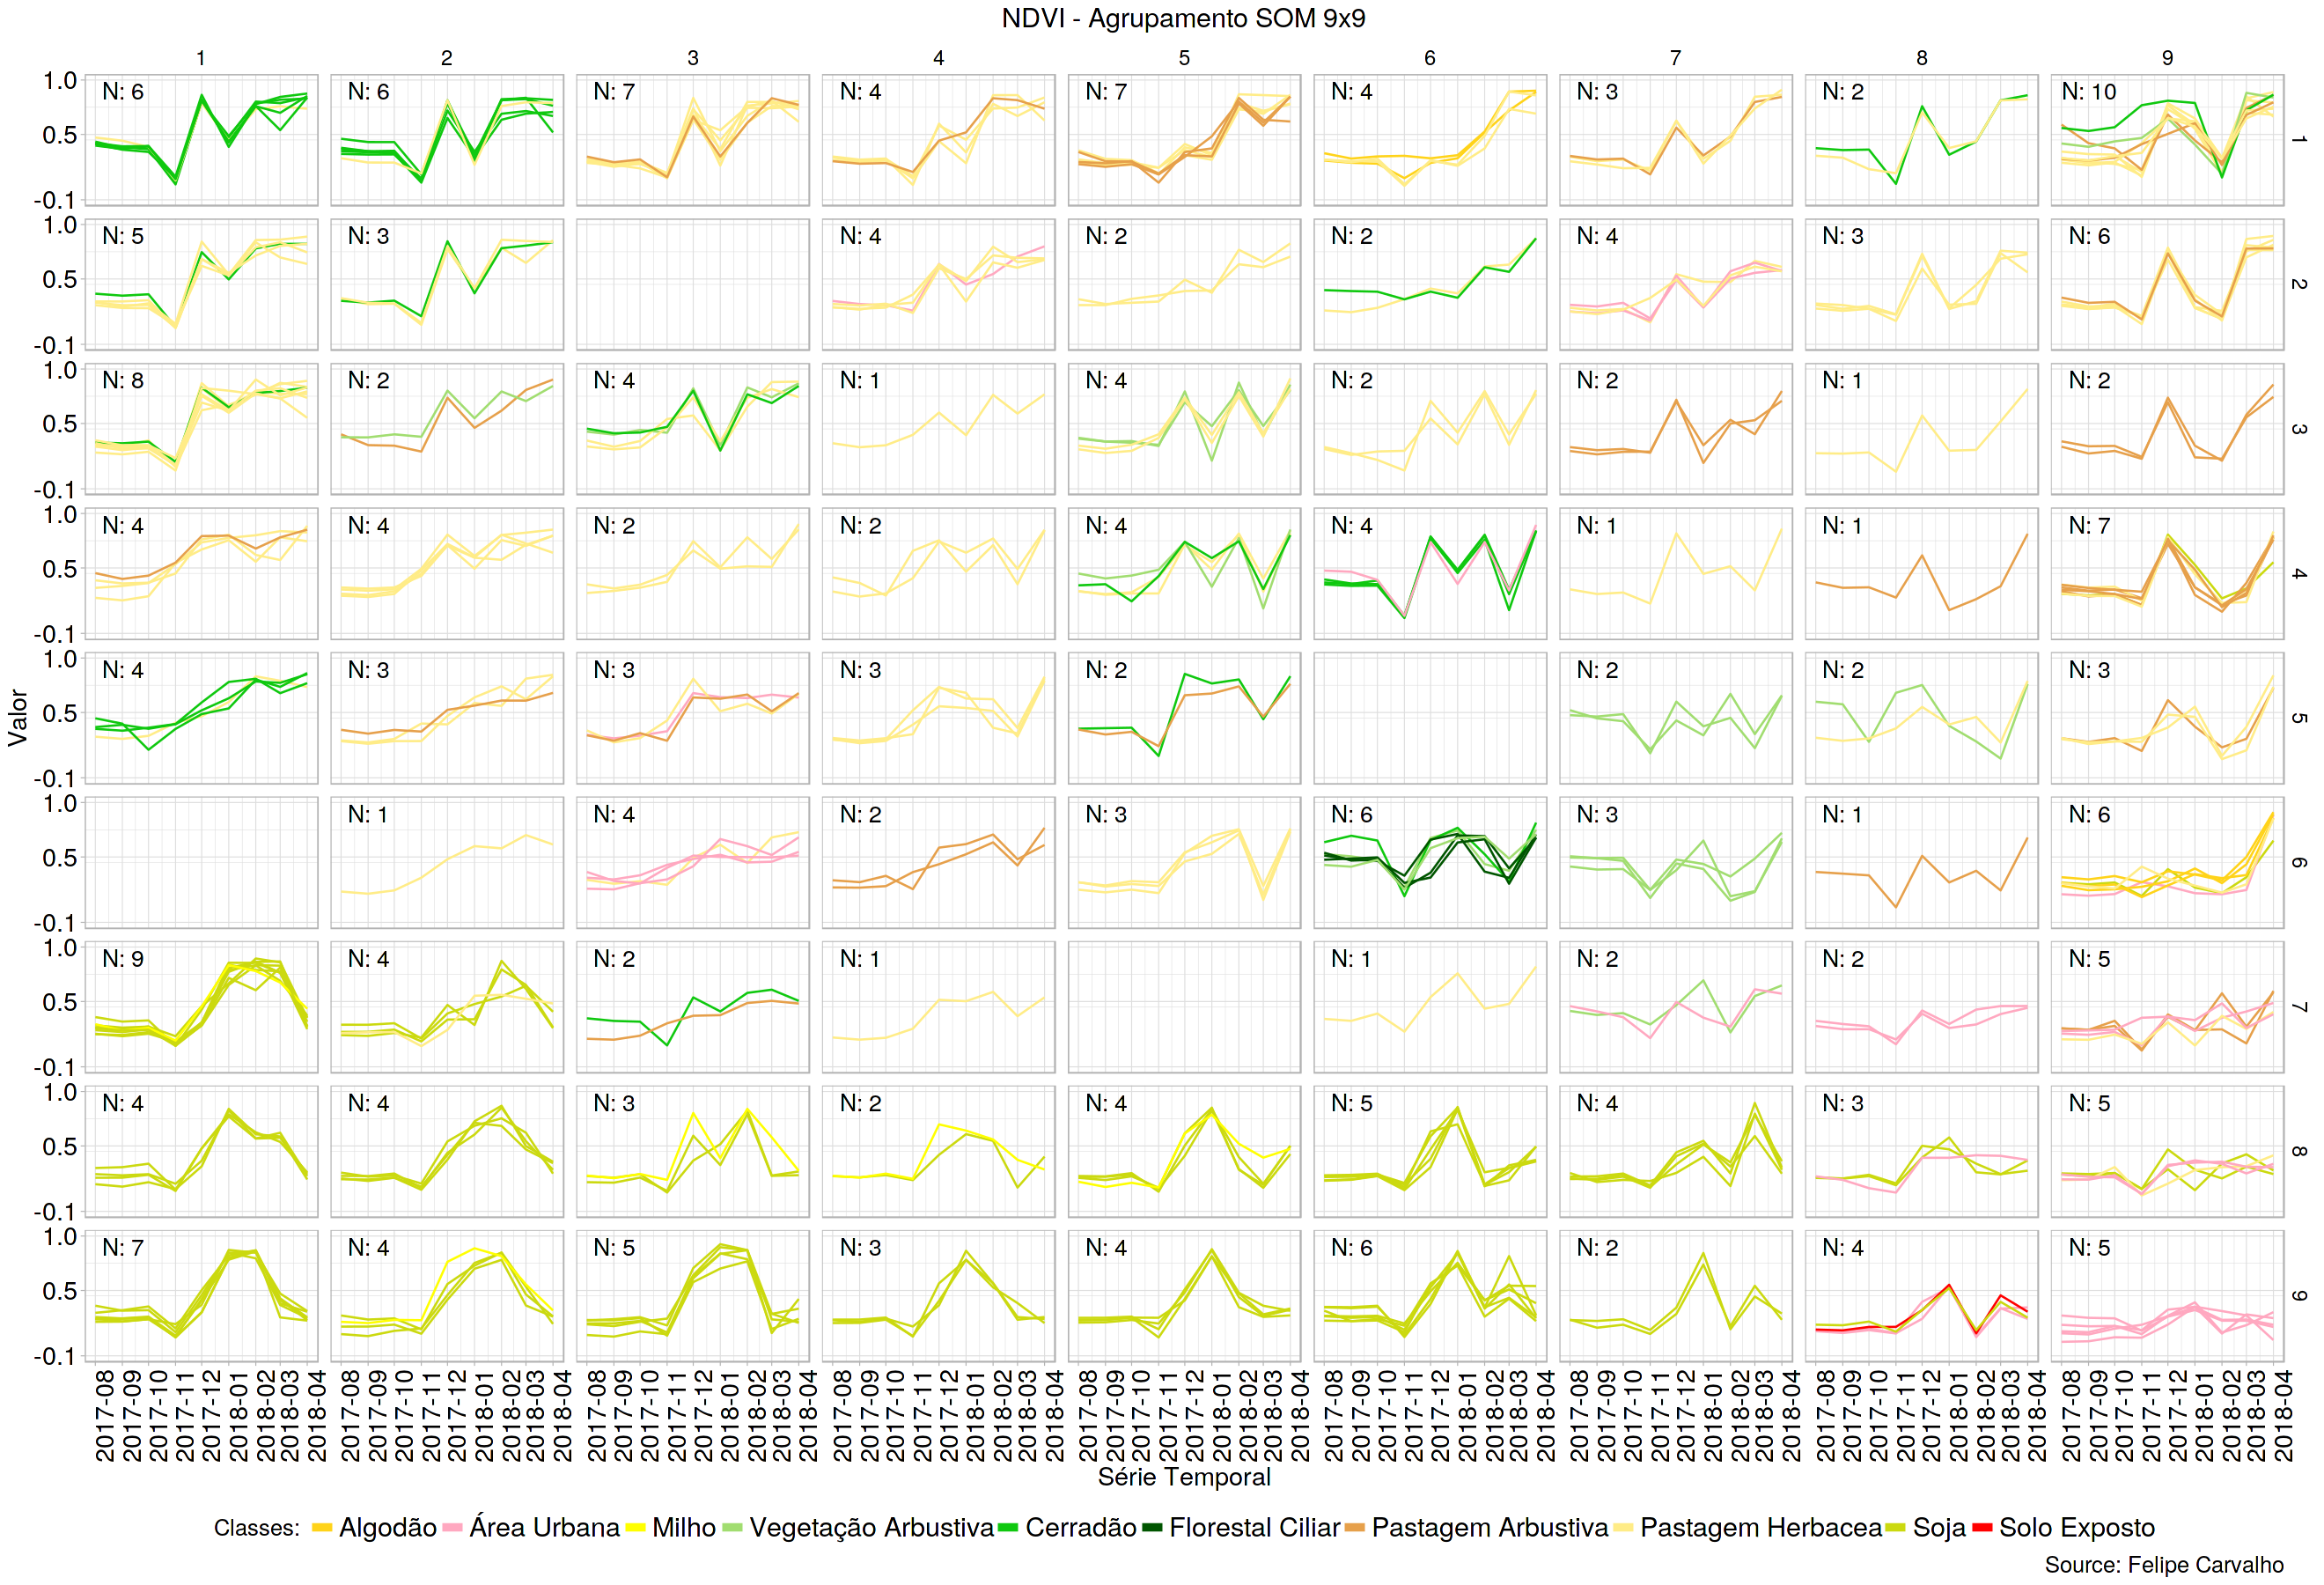

In [57]:
# Alteração das configurações de visualização
options(repr.plot.width=22, repr.plot.height=15)

ggplot2::ggplot(ggsom_data_9_9_cubes, aes(x = dias, y = valores, group = id, color=reference)) +
  geom_line(size=0.55) +
  labs(
    title = "NDVI - Agrupamento SOM 9x9",
    caption = "Source: Felipe Carvalho",
    y = "Valor",
    x = "Série Temporal"
  ) +
  facet_grid(y ~ x, labeller=label_parsed) +
  scale_y_continuous(limits = c(-0.1,1),
                     breaks=c(-0.1, 1, 0.5)) +
  scale_x_date(labels = date_format("%Y-%m"),
               breaks='1 month') +
  theme(
    strip.text.x = element_text(size = 14, colour = "black"),
    strip.text.y = element_text(size = 14, colour = "black"),
    plot.title = element_text(size = 18,
                              hjust= 0.5,
                              margin = margin(b = 7)),
    strip.background = element_blank(),
    panel.spacing = unit(0.6, "lines"),
    axis.text.x = element_text(angle = 90,
                               color = "black",
                               size  = 17,
                               hjust=50),
    axis.text.y = element_text(size = 17, color="black"),
    axis.title.x = element_text(margin = margin(t = 7),
                                size=17),
    axis.title.y = element_text(size = 17),
    legend.position="bottom",
    legend.key.size = unit(1.2, "lines"),
    legend.spacing = unit(0.1, "cm"),
    legend.text = element_text(size = 18),
    legend.title = element_text(size = 15),
    plot.caption = element_text(size = 15, color="black"),
    legend.spacing.x = unit(0.10, 'cm')) +
  guides(colour = guide_legend(nrow = 1, override.aes = list(size = 2)),
         label.hjust = 10,
         fill=guide_legend(
           keywidth=4,
           keyheight=0.1))+
  scale_color_manual(name = "Classes: ",
                     labels = c("Algodão",
                                "Área Urbana",
                                "Milho",
                                "Vegetação Arbustiva",
                                "Cerradão",
                                "Florestal Ciliar",
                                "Pastagem Arbustiva",
                                "Pastagem Herbacea",
                                "Soja",
                                "Solo Exposto"),
                     values = c("#ffd319",
                                "#ffa8c0",
                                "#ffff00",
                                "#a1dd70",
                                "#0fc80f",
                                "#005500",
                                "#e6a04b",
                                "#ffec87",
                                "#cbd90f",
                                "#ff0000")) +
  geom_text(aes(
    y = 0.90,
    x = as.Date("2017-09-02", "%Y-%m-%d"),
    label = paste("N:", sum)), check_overlap = TRUE,
    show.legend = FALSE,
    colour="black",
    size = 5.5)

O gráfico acima apresenta o agrupamento SOM para a série temporal gerada pelo pacote Gdalcubes. É possível detectar padrões de plantação e colheita nos neurônios 1x9, 1x8, 1x7, 2x8, 3x9 correspondentes às classes de Soja e Milho no período de novembro de 2017 a março de 2018. No entanto, os neurônios 5x3, 5x4 e 5x5 apresentam confusão espectro-temporal com Cerradão e Pastagem Herbácea, de forma semelhante ao agrupamento anterior. 

**7. Como medir a pureza de cada neurônio no SOM?**

Objetivo de medir a pureza de cada neurônio do SOM é verificar a similaridade intra-cluster, ou seja, se cada série temporal corresponde a mesma classe dentro de um neurônio. A entropia é obtida através da equação apresentada abaixo: 
<br/>

$$ e_j = \sum_{i=1}^{L} p_{ij}\log_2 p_{ij} $$ 

Onde $ p_{ij} = \frac{m_{ij}}{m_j} $, sendo $ m_j $ é a quantidade de observações do neurônio $j$ e $m_{ij}$ a quantidade de observações da classe $i$ correspondentes ao neurônio $j$. Adaptado de [10].


In [60]:
#' @title Função para obter a pureza de cada neurônio da rede SOM
#' @name get_entropy
#' @author Felipe Carvalho, \email{felipe.carvalho@@inpe.br}
#' 
#' @import entropy 
#'
#' @description Cálculo da entropia utilizando o método de máxima verossimilhança
#'
#' @param ggsom_gathered
#' @return Conjunto de dados com o atributo de pureza adicionado em formato de tibble
get_entropy <- function(ggsom_gathered){
  sum_values <- ggsom_gathered %>%
    dplyr::select(x,y, reference, id, sum) %>%
    dplyr::group_by(x,y,reference) %>%
    dplyr::summarise(a = n()/length(unique(ggsom_gathered$atributo))) %>%
    tidyr::spread(reference, a) %>%
    tidyr::gather(classe, valores, -x, -y) %>%
    dplyr::mutate(valores = replace_na(valores,0),
           soma = sum(valores)) %>%
    tidyr::spread(classe, valores)


  entropy <- sum_values %>% dplyr::select(everything()) %>%
    tidyr::gather(classe, valores, -x, -y, -soma) %>%
    dplyr::group_by(x, y) %>%
    dplyr::mutate(entropy = entropy::entropy(valores, method = "ML", unit = "log2")) %>%
    tidyr::spread(classe, valores) %>%
    dplyr::select(x, y, purity) %>%
    dplyr::right_join(ggsom_gathered, by=c("x","y"))

  return(entropy)
}

In [64]:
ggsom_data_9_9_entropy <- get_entropy(ggsom_data_9_9_cubes)

# Visualização das observações iniciais
head(ggsom_data_9_9_entropy, 3)

x y purity    unit.class reference id sum atributo valores   dias      
1 2 9 0.8112781 74         Soja      1  4   V1       0.1684303 2017-08-01
2 5 9 0.0000000 77         Soja      2  4   V1       0.2489380 2017-08-01
3 2 8 0.0000000 65         Soja      3  4   V1       0.1944930 2017-08-01

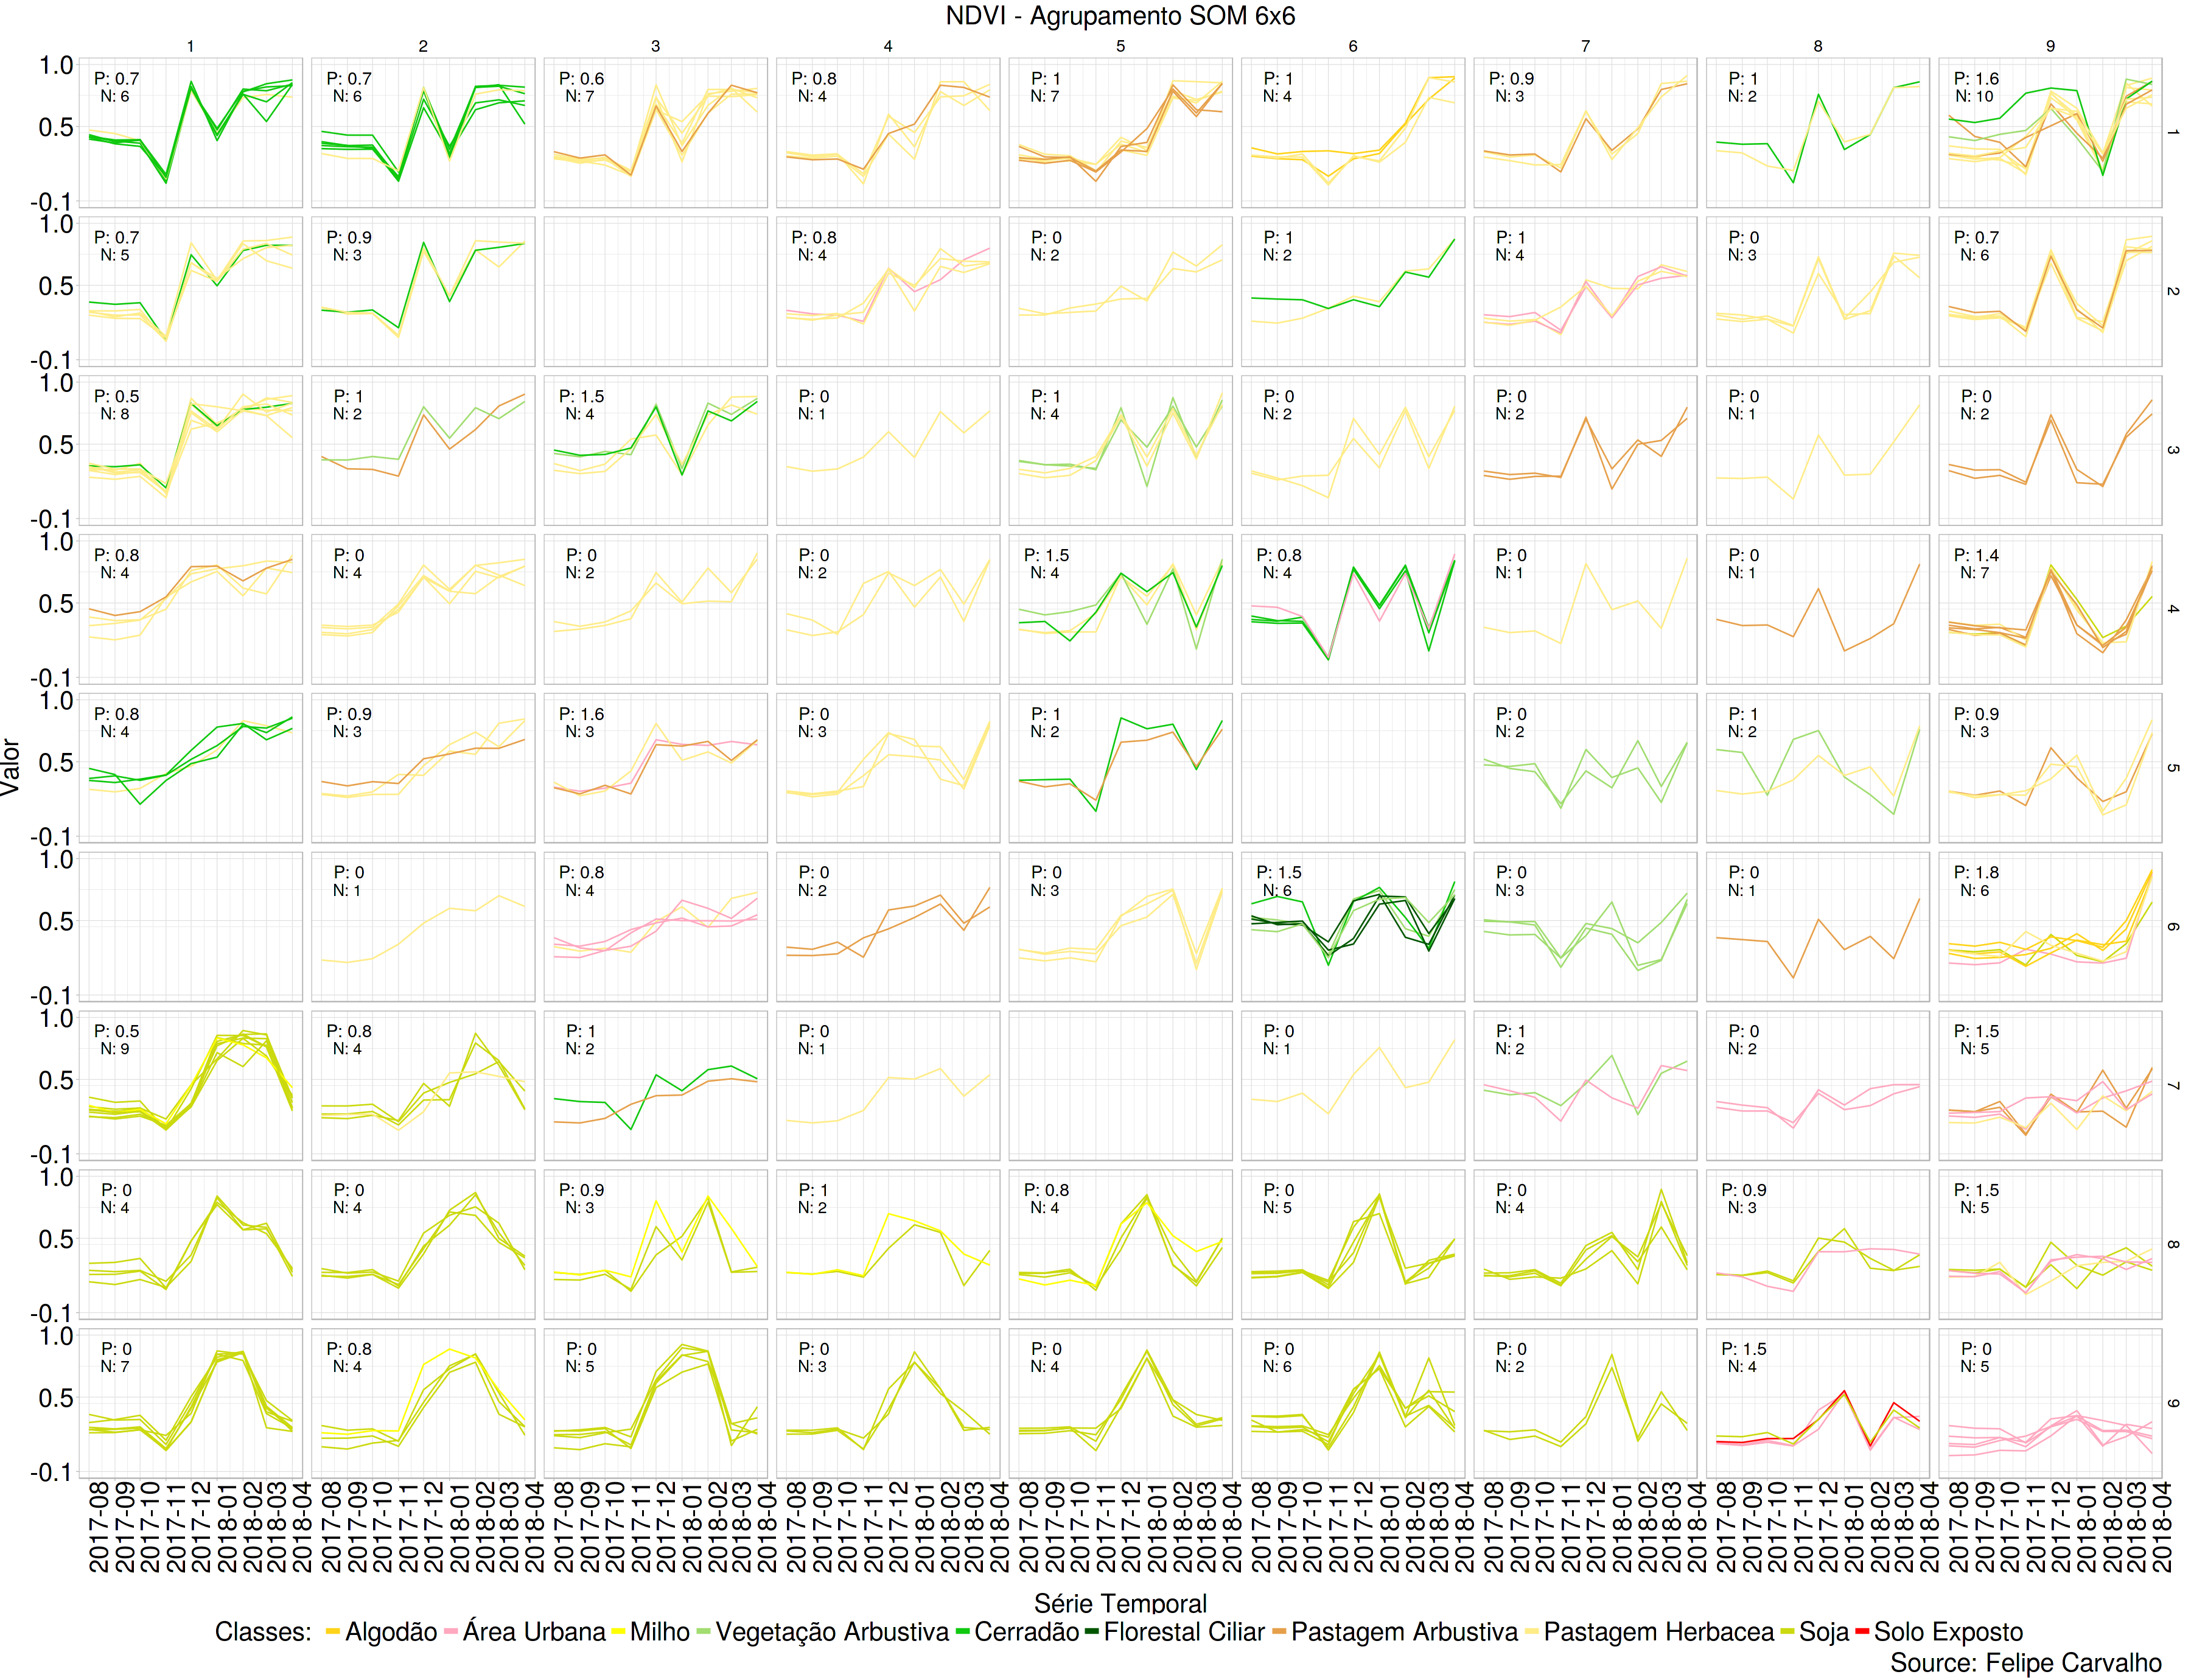

In [70]:
# Alteração das configurações de visualização
options(repr.plot.width=30, repr.plot.height=23)

ggplot2::ggplot(ggsom_data_9_9_entropy, aes(x = dias, y = valores, group = id, color=reference)) +
  geom_line(size=0.55) +
  labs(
    title = "NDVI - Agrupamento SOM 6x6",
    caption = "Source: Felipe Carvalho",
    y = "Valor",
    x = "Série Temporal"
  ) +
  facet_grid(y ~ x, labeller=label_parsed, scales = "free") +
  scale_y_continuous(limits = c(-0.1,1),
                     breaks=c(-0.1, 1, 0.5)) +
  scale_x_date(labels = date_format("%Y-%m"),
               breaks='1 month',
               limits = as.Date(c("2017-08-01", "2018-04-01"))) +
  theme(
    strip.text.x = element_text(size = 16, colour = "black"),
    strip.text.y = element_text(size = 16, colour = "black"),
    plot.title = element_text(size = 25,
                              hjust= 0.5,
                              margin = margin(b = 7)),
    strip.background = element_blank(),
    panel.spacing = unit(0.6, "lines"),
    axis.text.x = element_text(angle = 90,
                               color = "black",
                               size  = 25,
                               margin = margin(t = 0, r = -10, b = 0, l = 0)),
    axis.text.y = element_text(size = 25, color="black"),
    axis.title.x = element_text(margin = margin(t = 7),
                                size=25,
                                vjust=-3),
    axis.title.y = element_text(size = 25, vjust=3),
    legend.position="bottom",
    legend.key.size = unit(1.2, "lines"),
    legend.spacing = unit(0.1, "cm"),
    legend.text = element_text(size = 25),
    legend.title = element_text(size = 25),
    plot.caption = element_text(size = 25, color="black"),
    legend.spacing.x = unit(0.10, 'cm'))+
  guides(colour = guide_legend(nrow = 1, override.aes = list(size = 2)),
         label.hjust = 10,
         fill=guide_legend(
           keywidth=4,
           keyheight=1))+
  scale_color_manual(name = "Classes: ",
                     labels = c("Algodão",
                                "Área Urbana",
                                "Milho",
                                "Vegetação Arbustiva",
                                "Cerradão",
                                "Florestal Ciliar",
                                "Pastagem Arbustiva",
                                "Pastagem Herbacea",
                                "Soja",
                                "Solo Exposto"),
                     values = c("#ffd319",
                                "#ffa8c0",
                                "#ffff00",
                                "#a1dd70",
                                "#0fc80f",
                                "#005500",
                                "#e6a04b",
                                "#ffec87",
                                "#cbd90f",
                                "#ff0000")) +
  geom_text(aes(
    y = 0.75,
    x = as.Date("2017-09-01", "%Y-%m-%d"),
    label = paste("N:", sum)), check_overlap = TRUE,
    show.legend = FALSE,
    colour="black",
    size = 9) +
  geom_text(aes(
    y = 0.89,
    x = as.Date("2017-09-03", "%Y-%m-%d"),
    label = paste("E:",round(entropy, 1))), check_overlap = TRUE,
    show.legend = FALSE,
    colour="black",
    size = 9)

# Referências

[1] Giuliani, G., Chatenoux, B., De Bono, A., Rodila, D., Richard, J.-P., Allenbach, K., Dao,
H., and Peduzzi, P. (2017). Building an earth observations data cube: lessons learned
from the swiss data cube (sdc) on generating analysis ready data (ard). Big Earth Data,
1(1-2):100–117.

[2] Yang, H., Li, S., Chen, J., Zhang, X., and Xu, S. (2017). The standardization and harmonization of land cover classification systems towards harmonized datasets: a review.
ISPRS International Journal of Geo-Information, 6(5):154.

[3] Appel, M. and Pebesma, E. (2019). On-demand processing of data cubes from satellite
image collections with the gdalcubes library. Data, 4(3):92.

[4] Lu, M., Appel, M., and Pebesma, E. (2018). Multidimensional arrays for analysing geoscientific data. ISPRS International Journal of Geo-Information, 7(8):313.

[5] Lewis, A., Oliver, S., Lymburner, L., Evans, B., Wyborn, L., Mueller, N., Raevksi, G.,
Hooke, J., Woodcock, R., Sixsmith, J., et al. (2017). The australian geoscience data
cube—foundations and lessons learned. Remote Sensing of Environment, 202:276–
292

[6] Santos, L., Ferreira, K. R., Picoli, M., and Camara, G. (2019). Self-organizing maps in
earth observation data cubes analysis. In International Workshop on Self-Organizing
Maps, pages 70–79. Springer.

[7] Ibge (2013). Manual tecnico de uso da terra ´ , volume 3. IBGE.

[8] Claverie, M., Ju, J., Masek, J. G., Dungan, J. L., Vermote, E. F., Roger, J.-C., Skakun,
S. V., and Justice, C. (2018). The harmonized landsat and sentinel-2 surface reflectance
data set. Remote sensing of environment, 219:145–161.

[9] CEOS (2019). Land surface imaging. http://ceos.org/ourwork/virtual-constellations/lsi/. Acesso em: 2019-09-30.

[10] Jin (2008). Cluster Validation. http://www.cs.kent.edu/~jin/DM08/ClusterValidation.pdf. Acesso em: 2019-09-10.
